# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as scipy
from scipy import stats

# Importing Transcation Data-sets

In [2]:
df_trans= pd.read_excel("QVI_Transaction_Data.xlsx")
df_trans.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


##### Converting "Julian date format" to "Normal Date Format "

In [3]:
## A quick search online tells us that Microsoft CSV and Excel integer dates begin on 30 Dec 1899 OR 01 Jan 1900.

df_trans['DATE']=pd.to_datetime(df_trans['DATE'],unit="D", origin= pd.Timestamp('1900-01-01'))## We used 01 Jan 1900
df_trans.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Replacing Product Name in the correct way

In [4]:
df_trans['PRODUCT_NAME']= df_trans['PRODUCT_NAME'].replace({
    "Burger Rings 220g": "Burger Rings= Burger Rings-220g",
    "CCs Nacho Cheese    175g": "CCs= Nacho Cheese-175g",
    "CCs Original 175g": "CCs= Original-175g", 
    "CCs Tasty Cheese    175g": "CCs= Tasty Cheese-175g",
    "Cheetos Chs & Bacon Balls 190g": "Cheetos= Chs & Bacon Balls-190g",
    "Cheetos Puffs 165g": "Cheetos= Puffs-165g",
    "Cheezels Cheese 330g": "Cheezels= Cheese-330g",
    "Cheezels Cheese Box 125g": "Cheezels= Cheese Box-125g",
    "Cobs Popd Sea Salt  Chips 110g": "Cobs= Popd SeaSalt Chips-110g",
    "Cobs Popd Sour Crm  &Chives Chips 110g":"Cobs= Popd Sour Cream & Chives Chips-110g",
    "Cobs Popd Swt/Chlli &Sr/Cream Chips 110g" : "Cobs= Popd Sweet/Chilli & Sour/Cream Chips-110g",
    "Dorito Corn Chp     Supreme 380g": "Dorito= Corn Chip Supreme-380g",
    "Doritos Cheese      Supreme 330g":  "Doritos= Cheese  Supreme-330g",
    "Doritos Corn Chip Mexican Jalapeno 150g": "Doritos= Corn Chip Mexican Jalapeno-150g",
    "Doritos Corn Chip Southern Chicken 150g": "Doritos= Corn Chip Southern Chicken-150g",
    "Doritos Corn Chips  Cheese Supreme 170g": "Doritos= Corn Chips Cheese Supreme-170g",
    "Doritos Corn Chips  Nacho Cheese 170g": "Doritos= Corn Chips Nacho Cheese-170g",
    "Doritos Corn Chips  Original 170g": "Doritos= Corn Chips Original-170g",
    "Doritos Mexicana    170g": "Doritos= Mexicana-170g",
    "Doritos Salsa       Medium 300g": "Doritos= Salsa Medium-300g",
    "Doritos Salsa Mild  300g": "Doritos= Salsa Mild-300g",
    "French Fries Potato Chips 175g": "French Fries= Potato Chips-175g",
    "Grain Waves         Sweet Chilli 210g": "Grain Waves= Sweet Chilli-210g",
    "Grain Waves Sour    Cream&Chives 210G": "Grain Waves= Sour Cream & Chives-210g",
    "GrnWves Plus Btroot & Chilli Jam 180g": "Grain Waves= Plus Beetroot & Chilli Jam-180g",
    "Infuzions BBQ Rib   Prawn Crackers 110g": "Infuzions= BBQ Rib Prawn Crackers-110g",
    "Infuzions Mango     Chutny Papadums 70g": "Infuzions= Mango Chutny Papadums-70g",
    "Infuzions SourCream&Herbs Veg Strws 110g": "Infuzions= SourCream & Herbs Veg Strws-110g",
    "Infuzions Thai SweetChili PotatoMix 110g": "Infuzions= Thai SweetChili PotatoMix-110g",
    "Infzns Crn Crnchers Tangy Gcamole 110g": "Infuzions= Crn Crnchers Tangy Gcamole-110g",
    "Kettle 135g Swt Pot Sea Salt": "Kettle= Swt Pot SeaSalt-135g",
    "Kettle Chilli 175g": "Kettle= Chilli-175g",
    "Kettle Honey Soy    Chicken 175g": "Kettle= Honey SoyChicken-175g",
    "Kettle Mozzarella   Basil & Pesto 175g": "Kettle= Mozzarella Basil & Pesto-175g",
    "Kettle Original 175g": "Kettle= Original-175g",
    "Kettle Sea Salt     And Vinegar 175g": "Kettle= SeaSalt and Vinegar-175g",
    "Kettle Sensations   BBQ&Maple 150g": "Kettle= Sensations BBQ & Maple-150g",
    "Kettle Sensations   Camembert & Fig 150g": "Kettle= Sensations Camembert & Fig-150g",
    "Kettle Sensations   Siracha Lime 150g": "Kettle= Sensations Siracha Lime-150g",
    "Kettle Sweet Chilli And Sour Cream 175g": "Kettle= Sweet Chilli and Sour Cream-175g",
    "Kettle Tortilla ChpsBtroot&Ricotta 150g": "Kettle= Tortilla Chips Beetroot & Ricotta-150g",
    "Kettle Tortilla ChpsFeta&Garlic 150g": "Kettle= Tortilla Chips Feta & Garlic-150g",
    "Kettle Tortilla ChpsHny&Jlpno Chili 150g": "Kettle= Tortilla ChipsHny & Jlpno Chilli-150g",
    "Natural Chip        Compny SeaSalt175g": "Natural Chip Company= SeaSalt-175g",
    "Natural Chip Co     Tmato Hrb&Spce 175g": "Natural Chip Company= Tomato Hrb & Spce-175g",
    "Natural ChipCo      Hony Soy Chckn175g": "Natural Chip Company= Hony Soy Chicken-175g",
    "Natural ChipCo Sea  Salt & Vinegr 175g": "Natural Chip Company= SeaSalt & Vinegr-175g",
    "NCC Sour Cream &    Garden Chives 175g": "Natural Chip Company= Sour Cream & Garden Chives-175g",
    "Old El Paso Salsa   Dip Chnky Tom Ht300g": "Old El Paso= Salsa Dip Chnky Tom Ht-300g",
    "Old El Paso Salsa   Dip Tomato Med 300g": "Old El Paso= Salsa Dip Tomato Medium-300g",
    "Old El Paso Salsa   Dip Tomato Mild 300g": "Old El Paso= Salsa Dip Tomato Mild-300g",
    "Pringles Barbeque   134g": "Pringles= Barbeque-134g",
    "Pringles Chicken    Salt Crips 134g": "Pringles= Chicken Salt Crips-134g",
    "Pringles Mystery    Flavour 134g": "Pringles= Mystery Flavour-134g",
    "Pringles Original   Crisps 134g": "Pringles= Original Crisps-134g",
    "Pringles Slt Vingar 134g": "Pringles= Salt Vingar-134g",
    "Pringles SourCream  Onion 134g": "Pringles= SourCream  Onion-134g",
    "Pringles Sthrn FriedChicken 134g": "Pringles= Sthrn FriedChicken-134g",
    "Pringles Sweet&Spcy BBQ 134g": "Pringles= Sweet&Spcy BBQ-134g",
    "Red Rock Deli Chikn&Garlic Aioli 150g": "Red Rock Deli= Chikn & Garlic Aiol-150g",
    "Red Rock Deli Sp    Salt & Truffle 150G": "Red Rock Deli= Sp Salt & Truffle-150g",
    "Red Rock Deli SR    Salsa & Mzzrlla 150g": "Red Rock Deli= SR Salsa & Mzzrlla-150g",
    "Red Rock Deli Thai  Chilli&Lime 150g": "Red Rock Deli= Thai Chilli & Lime-150g",
    "RRD Chilli&         Coconut 150g": "Red Rock Deli= Chilli & Coconut-150g",
    "RRD Honey Soy       Chicken 165g": "Red Rock Deli= Honey SoyChicken-165g",
    "RRD Lime & Pepper   165g": "Red Rock Deli= Lime & Pepper-165g",
    "RRD Pc Sea Salt     165g": "Red Rock Deli= Pc SeaSalt-165g",
    "RRD Salt & Vinegar  165g": "Red Rock Deli= Salt & Vinegar-165g",
    "RRD SR Slow Rst     Pork Belly 150g": "Red Rock Deli= SR Slow Rst Pork Belly-150g",
    "RRD Steak &         Chimuchurri 150g": "Red Rock Deli= Steak & Chimuchurri-150g",
    "RRD Sweet Chilli &  Sour Cream 165g": "Red Rock Deli= Sweet Chilli & Sour Cream-165g",
    "Smith Crinkle Cut   Bolognese 150g": "Smith= Crinkle Cut Bolognese-150g",
    "Smith Crinkle Cut   Mac N Cheese 150g": "Smith= Crinkle Cut Mac N Cheese-150g",
    "Smiths Chip Thinly  Cut Original 175g": "Smiths= Chip Thinly Cut Original-175g",
    "Smiths Chip Thinly  CutSalt/Vinegr175g": "Smiths= Chip Thinly CutSalt/Vinegr-175g",
    "Smiths Chip Thinly  S/Cream&Onion 175g": "Smiths= Chip Thinly  S/Cream & Onion-175g",
    "Smiths Crinkle      Original 330g": "Smiths= Crinkle Original-330g",
    "Smiths Crinkle Chips Salt & Vinegar 330g": "Smiths= Crinkle Chips Salt & Vinegar-330g",
    "Smiths Crinkle Cut  Chips Barbecue 170g": "Smiths= Crinkle Cut Chips Barbecue-170g",
    "Smiths Crinkle Cut  Chips Chicken 170g": "Smiths= Crinkle Cut Chips Chicken-170g",
    "Smiths Crinkle Cut  Chips Chs&Onion170g": "Smiths= Crinkle Cut Chips Chs & Onion-170g",
    "Smiths Crinkle Cut  Chips Original 170g": "Smiths= Crinkle Cut Chips Original-170g",
    "Smiths Crinkle Cut  French OnionDip 150g": "Smiths= Crinkle Cut French Onion Dip-150g",
    "Smiths Crinkle Cut  Salt & Vinegar 170g": "Smiths= Crinkle Cut Salt & Vinegar-170g",
    "Smiths Crinkle Cut  Snag&Sauce 150g": "Smiths= Crinkle Cut Snag&Sauce-150g",
    "Smiths Crinkle Cut  Tomato Salsa 150g": "Smiths= Crinkle Cut Tomato Salsa-150g",
    "Smiths Crnkle Chip  Orgnl Big Bag 380g": "Smiths= Crnkle Chip Orgnl Big Bag-380g",
    "Smiths Thinly       Swt Chli&S/Cream175G": "Smiths= Thinly Swt Chilli & S/Cream-175g",
    "Smiths Thinly Cut   Roast Chicken 175g": "Smiths= Thinly Cut Roast Chicken-175g",
    "Snbts Whlgrn Crisps Cheddr&Mstrd 90g": "Sunbites= Wholegrain Crisps Cheddr & Mstrd-90g",
    "Sunbites Whlegrn    Crisps Frch/Onin 90g": "Sunbites= Wholegrain Crisps Frch/Onion-90g",
    "Thins Chips         Originl saltd 175g":"Thins= Chips Original saltd-175g",
    "Thins Chips Light&  Tangy 175g": "Thins= Chips Light & Tangy-175g",
    "Thins Chips Salt &  Vinegar 175g": "Thins= Chips Salt & Vinegar-175g",
    "Thins Chips Seasonedchicken 175g": "Thins= Chips SeasonedChicken-175g",
    "Thins Potato Chips  Hot & Spicy 175g": "Thins= Potato Chips Hot & Spicy-175g",
    "Tostitos Lightly    Salted 175g": "Tostitos= Lightly Salted-175g",
    "Tostitos Smoked     Chipotle 175g": "Tostitos= Smoked Chipotle-175g",
    "Tostitos Splash Of  Lime 175g": "Tostitos= Splash Of Lime-175g",
    "Twisties Cheese     270g": "Twisties= Cheese-270g",
    "Twisties Cheese     Burger 250g": "Twisties= Cheese Burger-250g",
    "Twisties Chicken270g": "Twisties= Chicken-270g",
    "Tyrrells Crisps     Ched & Chives 165g": "Tyrrells= Crisps Ched & Chives-165g",
    "Tyrrells Crisps     Lightly Salted 165g": "Tyrrells= Crisps Lightly Salted-165g",
    "Woolworths Cheese   Rings 190g": "Woolworths= CheeseRings-190g",
    "Woolworths Medium   Salsa 300g": "Woolworths= MediumSalsa-300g",
    "Woolworths Mild     Salsa 300g": "Woolworths= MildSalsa-300g",
    "WW Crinkle Cut      Chicken 175g": "Woolworths= Crinkle Cut Chicken-175g",
    "WW Crinkle Cut      Original 175g": "Woolworths= Crinkle Cut Original-175g",
    "WW D/Style Chip     Sea Salt 200g": "Woolworths= D/Style Chip Sea Salt-200g",
    "WW Original Corn    Chips 200g": "Woolworths= Original CornChips-200g",
    "WW Original Stacked Chips 160g": "Woolworths= Original Stacked Chips-160g",
    "WW Sour Cream &OnionStacked Chips 160g": "Woolworths= Sour Cream & OnionStacked Chips-160g",
    "WW Supreme Cheese   Corn Chips 200g": "Woolworths= Supreme CheeseCorn Chips-200g"
})

df_trans.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Company= SeaSalt-175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs= Nacho Cheese-175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths= Crinkle Cut Chips Chicken-170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths= Chip Thinly S/Cream & Onion-175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle= Tortilla ChipsHny & Jlpno Chilli-150g,3,13.8


In [5]:
df_trans['PRODUCT_NAME'].unique()

array(['Natural Chip Company= SeaSalt-175g', 'CCs= Nacho Cheese-175g',
       'Smiths= Crinkle Cut Chips Chicken-170g',
       'Smiths= Chip Thinly  S/Cream & Onion-175g',
       'Kettle= Tortilla ChipsHny & Jlpno Chilli-150g',
       'Old El Paso= Salsa Dip Tomato Mild-300g',
       'Smiths= Crinkle Chips Salt & Vinegar-330g',
       'Grain Waves= Sweet Chilli-210g',
       'Doritos= Corn Chip Mexican Jalapeno-150g',
       'Grain Waves= Sour Cream & Chives-210g',
       'Kettle= Sensations Siracha Lime-150g', 'Twisties= Cheese-270g',
       'Woolworths= Crinkle Cut Chicken-175g',
       'Thins= Chips Light & Tangy-175g', 'CCs= Original-175g',
       'Burger Rings= Burger Rings-220g',
       'Natural Chip Company= Sour Cream & Garden Chives-175g',
       'Doritos= Corn Chip Southern Chicken-150g',
       'Cheezels= Cheese Box-125g', 'Smiths= Crinkle Original-330g',
       'Infuzions= Crn Crnchers Tangy Gcamole-110g',
       'Kettle= SeaSalt and Vinegar-175g',
       'Smiths= Chip Thin

## EDA:-  
Looking for inconsistencies in the Transaction data-set

In [6]:
df_trans.describe()

,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_QTY,TOTAL_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [7]:
df_trans.isnull().count()

DATE                   264836
STORE_NUMBER           264836
LOYALTY_CARD_NUMBER    264836
TRANSACTION_ID         264836
PRODUCT_NUMBER         264836
PRODUCT_NAME           264836
PRODUCT_QTY            264836
TOTAL_SALES            264836
dtype: int64

In the DESCRIBE() section we found out that there is an outlier in the PRoduct_Qty and TOtal_Sale as the MAX-Product_qty is 200 and the MAX-Total_Sale is 650. So we have to look into it.

In [8]:
df_trans_proQty= df_trans['PRODUCT_QTY']== 200
df_trans[df_trans_proQty]

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES
69762,2018-08-21,226,226000,226201,4,Dorito= Corn Chip Supreme-380g,200,650.0
69763,2019-05-22,226,226000,226210,4,Dorito= Corn Chip Supreme-380g,200,650.0


We have DROPPED the Outliers as there are only 2 outliers and the Customer could be a shop owner.That is why the chips packet might have been bought in bulk.

In [9]:
df_trans= df_trans.drop(index=[69762,69763])
df_trans.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Company= SeaSalt-175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs= Nacho Cheese-175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths= Crinkle Cut Chips Chicken-170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths= Chip Thinly S/Cream & Onion-175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle= Tortilla ChipsHny & Jlpno Chilli-150g,3,13.8


In [10]:
df_trans.describe()

,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_QTY,TOTAL_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


Here, we are now seperating the WEIGHT from the PRODUCT_NAME in a different column. We are also seperating the ITEM_TYPE from the PRODUCT_NAME, where, PRODUCT_NAME is the BRAND and ITEM_TYPE is different types of CHIPS

In [11]:
df_trans[["PRODUCT_NAME",'PACKAGE_SIZE']]= df_trans['PRODUCT_NAME'].str.split('-',n=1, expand=True)
df_trans[['PRODUCT_NAME', "ITEMS_TYPE"]]= df_trans['PRODUCT_NAME'].str.split('=', n=0, expand=True)
df_trans.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE
0,2018-10-19,1,1000,1,5,Natural Chip Company,2,6.0,175g,SeaSalt
1,2019-05-16,1,1307,348,66,CCs,3,6.3,175g,Nacho Cheese
2,2019-05-22,1,1343,383,61,Smiths,2,2.9,170g,Crinkle Cut Chips Chicken
3,2018-08-19,2,2373,974,69,Smiths,5,15.0,175g,Chip Thinly S/Cream & Onion
4,2018-08-20,2,2426,1038,108,Kettle,3,13.8,150g,Tortilla ChipsHny & Jlpno Chilli


In [12]:
## This line of code is used to see all the THINGS in the OUTPUT section 

pd.set_option('display.max_rows', None) 

##### Find the different chips FLAVOURS

In [13]:
df_trans['ITEMS_TYPE'].value_counts(ascending=False)

 Cheese                                  6264
 Original                                4673
 Honey SoyChicken                        4661
 Mozzarella Basil & Pesto                3304
 Tortilla ChipsHny & Jlpno Chilli        3296
 Popd Sweet/Chilli & Sour/Cream Chips    3269
 Crisps Ched & Chives                    3268
 Popd SeaSalt Chips                      3265
 Swt Pot SeaSalt                         3257
 Splash Of Lime                          3252
 Thai SweetChili PotatoMix               3242
 Crnkle Chip Orgnl Big Bag               3233
 Potato Chips Hot & Spicy                3229
 Sensations Camembert & Fig              3219
 Corn Chips Cheese Supreme               3217
 Barbeque                                3210
 Corn Chip Mexican Jalapeno              3204
 Sweet Chilli and Sour Cream             3200
 Crinkle Chips Salt & Vinegar            3197
 Chips Light & Tangy                     3188
 Corn Chip Supreme                       3183
 Sweet&Spcy BBQ                   

In [14]:
df_trans.describe(include="all")

C:\Users\Personal\AppData\Local\Temp/ipykernel_14796/1832259370.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_trans.describe(include="all")


,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834,264834.000000,264834.000000,264834,264834
unique,364,NaN,NaN,NaN,NaN,23,NaN,NaN,21,111
top,2018-12-26 00:00:00,NaN,NaN,NaN,NaN,Kettle,NaN,NaN,175g,Cheese
freq,939,NaN,NaN,NaN,NaN,41288,NaN,NaN,66390,6264
first,2018-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.079423,1.355488e+05,1.351576e+05,56.583554,NaN,1.905813,7.299346,NaN,NaN
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,NaN,0.343436,2.527241,NaN,NaN
min,NaN,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000,NaN,NaN
25%,NaN,70.000000,7.002100e+04,6.760050e+04,28.000000,NaN,2.000000,5.400000,NaN,NaN


The details from this Dataset are as follows:-

1> The First Date is '2018-07-03" and the Last Date is "2019-07-02" which means that there are 364 days in this dataset.

2> The outliers in the PRODUCT_QTY (200 packets) and TOTAL_SALES ($650) have been removed. 

3> The Minimum Packet sold was 1 unit and the Minimum TOTAL_SALES amount is $1.50 .

4> The 25%tile of the PRODUCT_QTY is 2, meaning that 25% of the PRODUCT_QTY value is less then 2 -- and 25%tile of TOTAL_SALES is $5.40, meaning  that 25% of the units sold cost less then $5.40 .

5> The 75%tile of the PRODUCT_QTY is 2, meaning that 75% of the PRODUCT_QTY value is less then 2 -- and 75%tile of TOTAL_SALES is $9.20, meaning  that 75% of the units sold cost less then $9.20 .

6> The Maximum Packets sold was 5 unit and the Maximum TOTAL_SALES amount is $29.50

##### Find the Brand names of the CHIPS

In [15]:
df_trans['PRODUCT_NAME'].value_counts(ascending=False)

Kettle                  41288
Smiths                  28860
Pringles                25102
Doritos                 24962
Red Rock Deli           17779
Woolworths              14757
Infuzions               14201
Thins                   14075
Cobs                     9693
Tostitos                 9471
Twisties                 9454
Old El Paso              9324
Grain Waves              7740
Natural Chip Company     7469
Tyrrells                 6442
Cheezels                 4603
CCs                      4551
Dorito                   3183
Sunbites                 3008
Smith                    2963
Cheetos                  2927
Burger Rings             1564
French Fries             1418
Name: PRODUCT_NAME, dtype: int64

# Importing PURCHASE Data-sets

In [16]:
df_purch= pd.read_csv('QVI_Purchase_Behaviour.csv')
df_purch.head(5)

,LOYALTY_CARD_NUMBER,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Changing the column name PREMIUM_CUSTOMER to MEMBER_TYPE

In [17]:
df_purch= df_purch.rename(columns= {"PREMIUM_CUSTOMER": "MEMBER_TYPE"})
df_purch.head(10)

,LOYALTY_CARD_NUMBER,LIFESTAGE,MEMBER_TYPE
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [18]:
df_purch.describe(include="all")

,LOYALTY_CARD_NUMBER,LIFESTAGE,MEMBER_TYPE
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [19]:
df_purch.isnull().count()

LOYALTY_CARD_NUMBER    72637
LIFESTAGE              72637
MEMBER_TYPE            72637
dtype: int64

# MERGING the TRANSACTION and PURCHASE DATA-SET over LOYALTY CARD

In [20]:
df_trans_purch= pd.merge(df_trans, df_purch,how='left' ,on= 'LOYALTY_CARD_NUMBER')
df_trans_purch.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE
0,2018-10-19,1,1000,1,5,Natural Chip Company,2,6.0,175g,SeaSalt,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs,3,6.3,175g,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths,2,2.9,170g,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths,5,15.0,175g,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle,3,13.8,150g,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget


In [21]:
df_trans_purch.tail(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE
264829,2019-03-11,272,272319,270088,89,Kettle,2,10.8,175g,Sweet Chilli and Sour Cream,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-15,272,272358,270154,74,Tostitos,1,4.4,175g,Splash Of Lime,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-08,272,272379,270187,51,Doritos,2,8.8,170g,Mexicana,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-29,272,272379,270188,42,Doritos,2,7.8,150g,Corn Chip Mexican Jalapeno,YOUNG SINGLES/COUPLES,Premium
264833,2018-09-24,272,272380,270189,74,Tostitos,2,8.8,175g,Splash Of Lime,YOUNG SINGLES/COUPLES,Premium


In [22]:
df_trans_purch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 264834 non-null  datetime64[ns]
 1   STORE_NUMBER         264834 non-null  int64         
 2   LOYALTY_CARD_NUMBER  264834 non-null  int64         
 3   TRANSACTION_ID       264834 non-null  int64         
 4   PRODUCT_NUMBER       264834 non-null  int64         
 5   PRODUCT_NAME         264834 non-null  object        
 6   PRODUCT_QTY          264834 non-null  int64         
 7   TOTAL_SALES          264834 non-null  float64       
 8   PACKAGE_SIZE         264834 non-null  object        
 9   ITEMS_TYPE           264834 non-null  object        
 10  LIFESTAGE            264834 non-null  object        
 11  MEMBER_TYPE          264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 26.3

##  STATISTICAL DATA ANALYSIS:- PART-1

##### Looking at the TOTAL SALES 

In [23]:
total_sales_summing= df_trans_purch['TOTAL_SALES'].sum()
total_sales= round(total_sales_summing)
total_sales

1933115

##### Checking the TOTAL QUANTITY sold

In [24]:
total_quantity= df_trans_purch['PRODUCT_QTY'].sum()
total_quantity

504724

##### Checking which Packet Size was sold the most

In [25]:
df_packt_size= df_trans_purch[['PRODUCT_NAME',"PRODUCT_QTY", 'PACKAGE_SIZE', 'TOTAL_SALES']]
df_packt_size.head(5)

,PRODUCT_NAME,PRODUCT_QTY,PACKAGE_SIZE,TOTAL_SALES
0,Natural Chip Company,2,175g,6.0
1,CCs,3,175g,6.3
2,Smiths,2,170g,2.9
3,Smiths,5,175g,15.0
4,Kettle,3,150g,13.8


In [26]:
grouping_packt_size= df_packt_size.groupby("PACKAGE_SIZE")['PRODUCT_QTY'].sum()
grouping_packt_size

PACKAGE_SIZE
110g     42835
125g      2730
134g     48019
135g      6212
150g     82174
160g      5604
165g     29051
170g     38088
175g    126467
180g      2764
190g      5673
200g      8425
210g     11962
220g      2970
250g      6069
270g     12049
300g     28813
330g     23999
380g     12273
70g       2855
90g       5692
Name: PRODUCT_QTY, dtype: int64

Text(0, 0.5, 'PRODUCT_QTY in percentage')

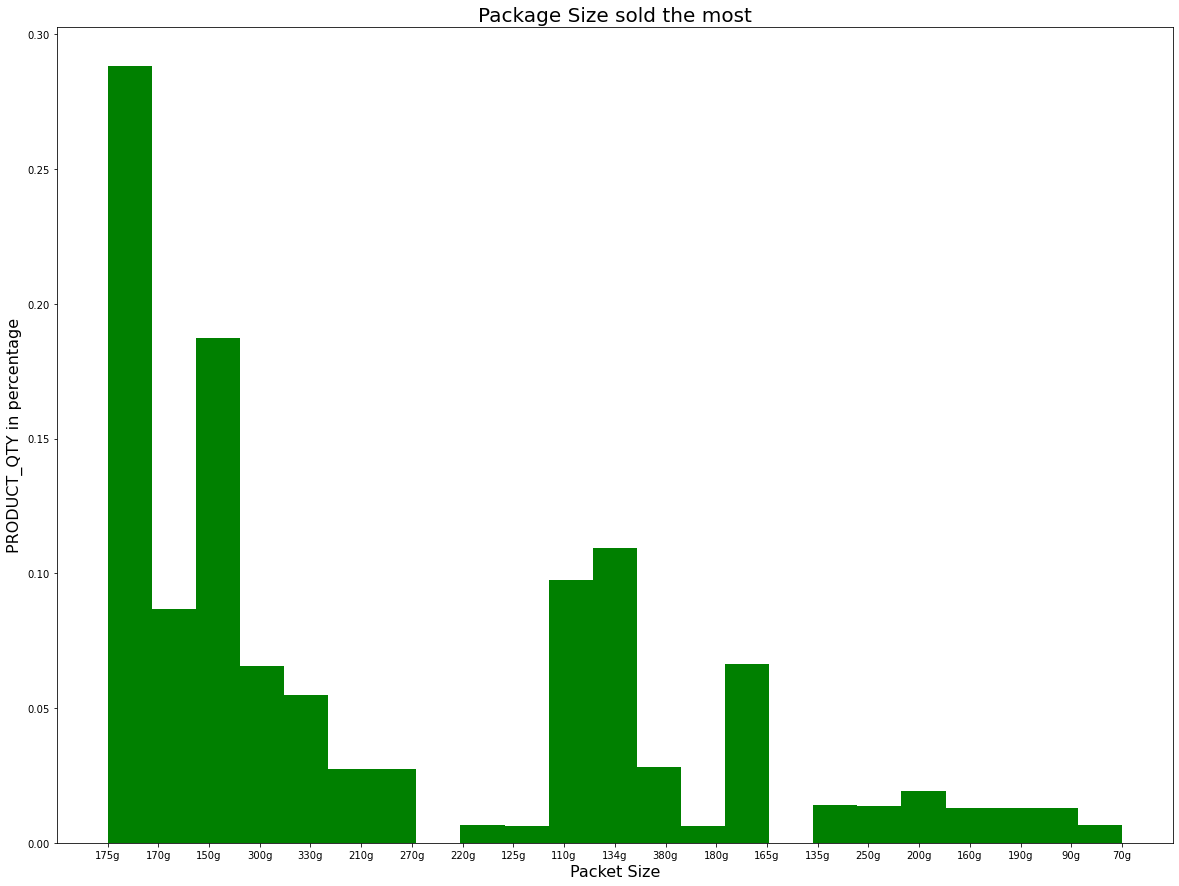

In [27]:
plt.figure(figsize=(20,15))
plt.hist(x=df_packt_size["PACKAGE_SIZE"], bins=23, weights=df_packt_size['PRODUCT_QTY'],color='green', density= True, orientation= "vertical", histtype= 'bar')
plt.title('Package Size sold the most', fontsize=20)
plt.xlabel('Packet Size', fontsize=16) 
plt.ylabel('PRODUCT_QTY in percentage', fontsize=16)

The package size of 175g made the HIGHEST SALE covering around 25.05% of the TOTAL QUANTITY sold and the package size of 125g made the LOWEST SALE covering around 0.54% of the TOTAL QUANTITY.

##### Checking where is the HIGHEST SALE coming from

In [28]:
df_highest= df_trans_purch[['PRODUCT_NAME',"PRODUCT_QTY", 'ITEMS_TYPE', 'TOTAL_SALES']]
df_highest.head(5)

,PRODUCT_NAME,PRODUCT_QTY,ITEMS_TYPE,TOTAL_SALES
0,Natural Chip Company,2,SeaSalt,6.0
1,CCs,3,Nacho Cheese,6.3
2,Smiths,2,Crinkle Cut Chips Chicken,2.9
3,Smiths,5,Chip Thinly S/Cream & Onion,15.0
4,Kettle,3,Tortilla ChipsHny & Jlpno Chilli,13.8


In [29]:
## GROUPING the data by Product Names.
grouping_totalBRAND_sale= df_highest.groupby('PRODUCT_NAME')['TOTAL_SALES'].sum()
grouping_totalBRAND_sale

PRODUCT_NAME
Burger Rings              6831.0
CCs                      18078.9
Cheetos                  16884.5
Cheezels                 40029.9
Cobs                     70569.8
Dorito                   39052.0
Doritos                 201538.9
French Fries              7929.0
Grain Waves              51617.2
Infuzions                99047.6
Kettle                  390239.8
Natural Chip Company     42318.0
Old El Paso              90785.1
Pringles                177655.5
Red Rock Deli            95046.0
Smith                    14583.4
Smiths                  210076.8
Sunbites                  9676.4
Thins                    88852.5
Tostitos                 79789.6
Twisties                 81522.1
Tyrrells                 51647.4
Woolworths               49343.6
Name: TOTAL_SALES, dtype: float64

Text(0, 0.5, 'Brand Names')

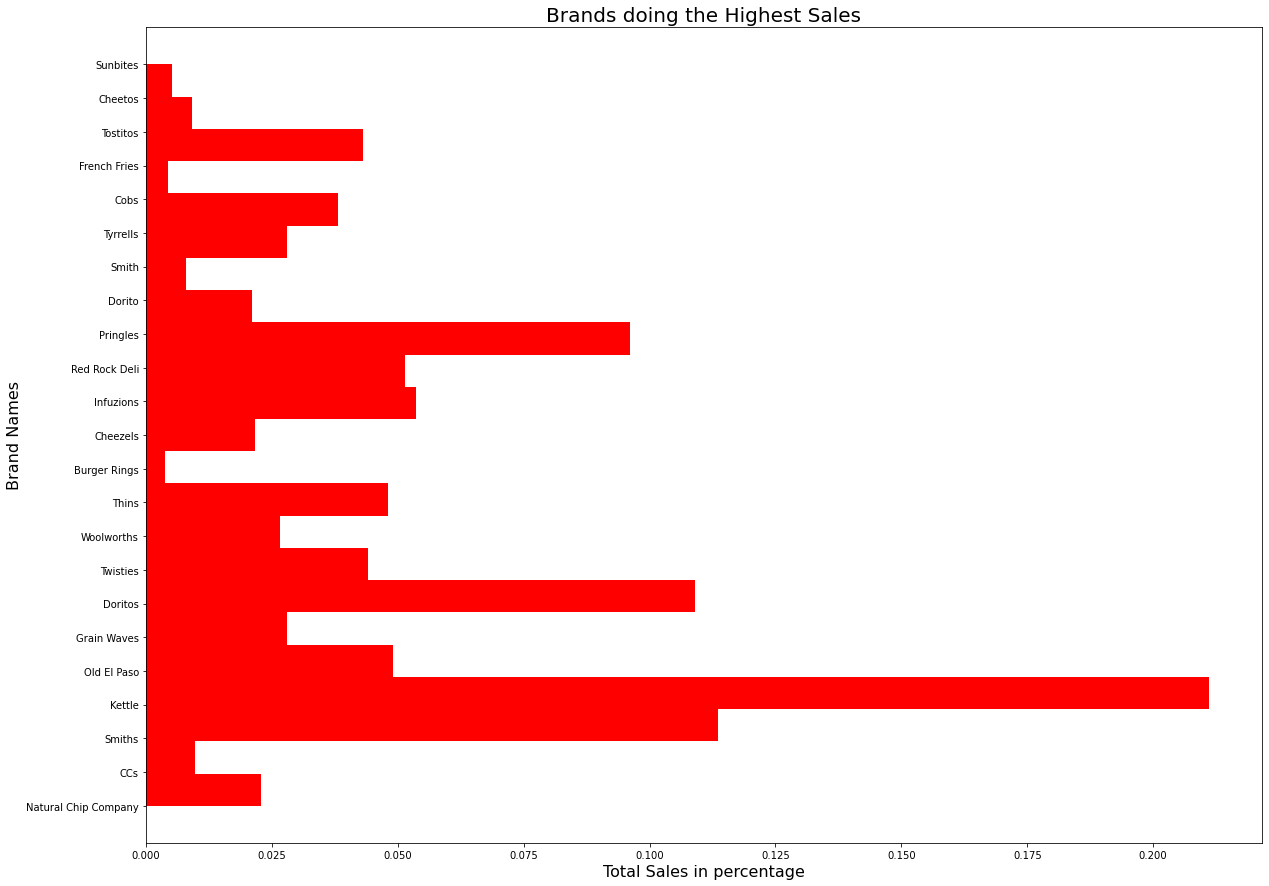

In [30]:
plt.figure(figsize=(20,15))
plt.hist(x=df_highest["PRODUCT_NAME"], bins=23, weights=df_highest['TOTAL_SALES'],color='red', density= True, orientation= "horizontal", histtype= 'bar')
plt.title('Brands doing the Highest Sales', fontsize=20)
plt.xlabel('Total Sales in percentage', fontsize=16) 
plt.ylabel('Brand Names', fontsize=16)

As we can see that the HIGHEST SALEs is coming from the Kettle's which has around 20.19% of the Total Sales in the Supermarket, and the LOWEST SALEs was made by Burger Rings which has around 0.35% of the Total Sales

##### Which Flavour of the KATTEL CHIPS was bought the most ?

In [31]:
df_KATTEL_Chips= df_trans_purch[['PRODUCT_NAME','PRODUCT_QTY','ITEMS_TYPE','LIFESTAGE','MEMBER_TYPE' ]]
df_KATTEL_Chips.head(5)

,PRODUCT_NAME,PRODUCT_QTY,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE
0,Natural Chip Company,2,SeaSalt,YOUNG SINGLES/COUPLES,Premium
1,CCs,3,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget
2,Smiths,2,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget
3,Smiths,5,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,Budget
4,Kettle,3,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget


In [32]:
df_KATTEL_2=df_KATTEL_Chips['PRODUCT_NAME']=='Kettle'
df_KATTEL=df_KATTEL_Chips[df_KATTEL_2]
df_KATTEL.head(5)

,PRODUCT_NAME,PRODUCT_QTY,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE
4,Kettle,3,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget
11,Kettle,5,Sensations Siracha Lime,MIDAGE SINGLES/COUPLES,Budget
23,Kettle,1,SeaSalt and Vinegar,MIDAGE SINGLES/COUPLES,Budget
24,Kettle,2,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget
27,Kettle,1,Original,MIDAGE SINGLES/COUPLES,Budget


In [33]:
df_KATTEL['ITEMS_TYPE'].unique()

array([' Tortilla ChipsHny & Jlpno Chilli', ' Sensations Siracha Lime',
       ' SeaSalt and Vinegar', ' Original', ' Chilli',
       ' Mozzarella Basil & Pesto', ' Sensations Camembert & Fig',
       ' Honey SoyChicken', ' Sweet Chilli and Sour Cream',
       ' Swt Pot SeaSalt', ' Sensations BBQ & Maple',
       ' Tortilla Chips Beetroot & Ricotta',
       ' Tortilla Chips Feta & Garlic'], dtype=object)

In [34]:
## Which KATTEL CHIP were bought the most.

grouping_Kattel_Chip_1= df_KATTEL.groupby('ITEMS_TYPE')['PRODUCT_QTY'].sum()
grouping_Kattel_Chip_1

ITEMS_TYPE
 Chilli                               5792
 Honey SoyChicken                     6033
 Mozzarella Basil & Pesto             6381
 Original                             6064
 SeaSalt and Vinegar                  6035
 Sensations BBQ & Maple               5910
 Sensations Camembert & Fig           6157
 Sensations Siracha Lime              5993
 Sweet Chilli and Sour Cream          6120
 Swt Pot SeaSalt                      6212
 Tortilla Chips Beetroot & Ricotta    6037
 Tortilla Chips Feta & Garlic         6008
 Tortilla ChipsHny & Jlpno Chilli     6309
Name: PRODUCT_QTY, dtype: int64

<AxesSubplot:ylabel='ITEMS_TYPE'>

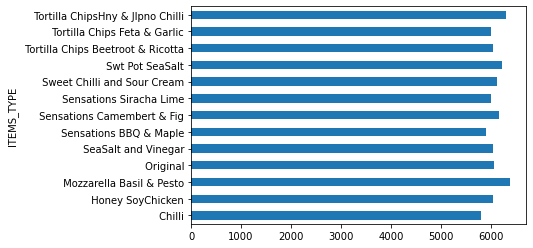

In [35]:
grouping_Kattel_Chip_1.plot.barh()

In the graph we can see that the KATTEL's Mozzarella Basil & Pesto Chips was bought the most by the Customers compaired to the other KATTEL chips 

#### Which Member Type bought which KATTEL chips the most 

In [36]:
grouping_Kattel_Chip_2= df_KATTEL.groupby(['MEMBER_TYPE','ITEMS_TYPE'])['PRODUCT_QTY'].sum()
grouping_Kattel_Chip_2

MEMBER_TYPE  ITEMS_TYPE                        
Budget        Chilli                               2014
              Honey SoyChicken                     1987
              Mozzarella Basil & Pesto             2267
              Original                             2120
              SeaSalt and Vinegar                  2132
              Sensations BBQ & Maple               1953
              Sensations Camembert & Fig           2084
              Sensations Siracha Lime              2081
              Sweet Chilli and Sour Cream          2152
              Swt Pot SeaSalt                      2111
              Tortilla Chips Beetroot & Ricotta    2057
              Tortilla Chips Feta & Garlic         2074
              Tortilla ChipsHny & Jlpno Chilli     2168
Mainstream    Chilli                               2215
              Honey SoyChicken                     2421
              Mozzarella Basil & Pesto             2463
              Original                             2340


In [37]:
creating_df= grouping_Kattel_Chip_2.reset_index()
creating_df

,MEMBER_TYPE,ITEMS_TYPE,PRODUCT_QTY
0,Budget,Chilli,2014
1,Budget,Honey SoyChicken,1987
2,Budget,Mozzarella Basil & Pesto,2267
3,Budget,Original,2120
4,Budget,SeaSalt and Vinegar,2132
5,Budget,Sensations BBQ & Maple,1953
6,Budget,Sensations Camembert & Fig,2084
7,Budget,Sensations Siracha Lime,2081
8,Budget,Sweet Chilli and Sour Cream,2152
9,Budget,Swt Pot SeaSalt,2111


Text(0, 0.5, 'Product Quantity')

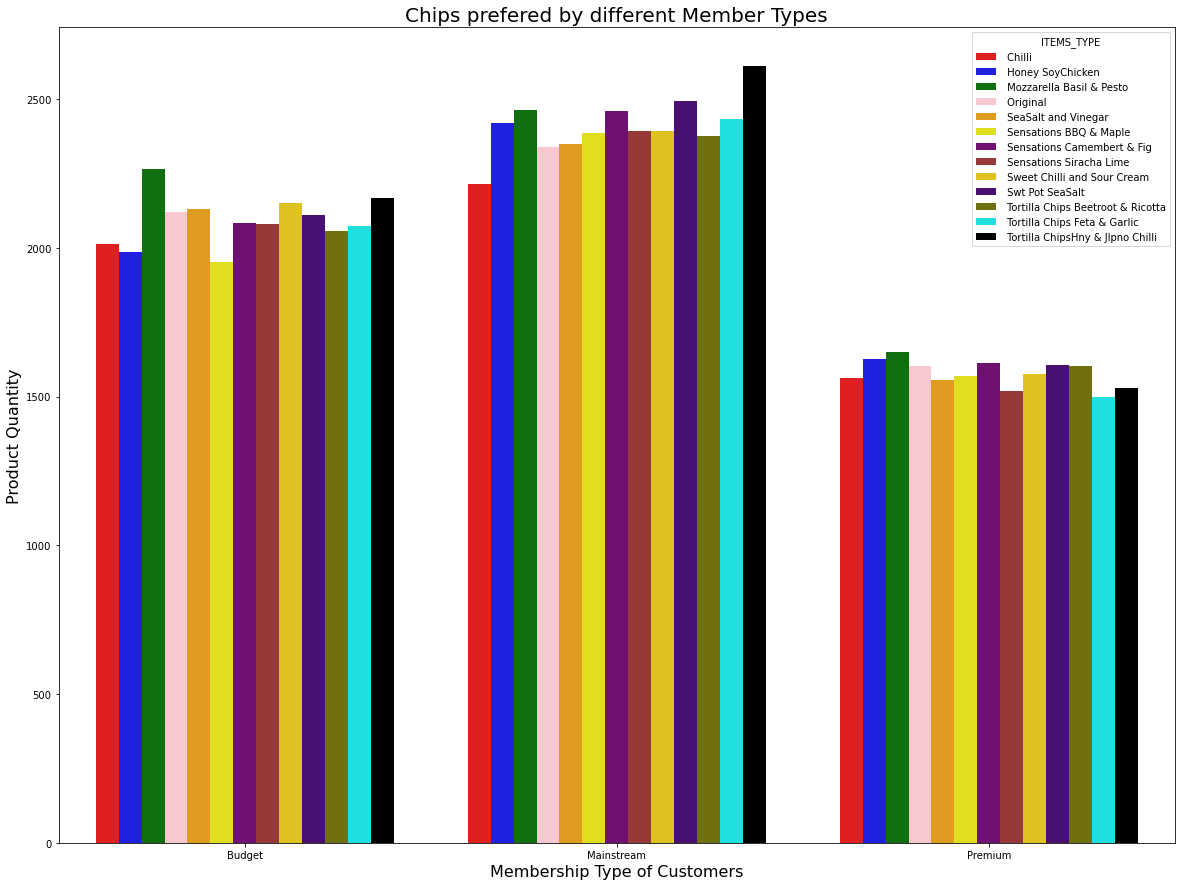

In [38]:
plt.figure(figsize=(20,15))
plt.title('Chips prefered by different Member Types', fontsize=20)
membertype= sns.barplot(x= creating_df['MEMBER_TYPE'], y= creating_df['PRODUCT_QTY'], hue= creating_df['ITEMS_TYPE'], orient='v',palette=['red','blue','green','pink','orange','yellow','purple', 'brown','gold', 'indigo', 'olive', 'aqua', 'black'])
plt.xlabel('Membership Type of Customers', fontsize= 16)
plt.ylabel("Product Quantity", fontsize=16)

Here, the Mozzarella Basil & Pesto was prefered by both the Budget and Premium Membership holder while the Mainstream membership holder prefered the Tortilla Chips Honey & Jalapeno Chilli. The details follows:-

1> Budget (Mozzarella Basil & Pesto)= 2267 units purchased

2> Premium (Mozzarella Basil & Pesto)= 1651 units purchased

3> Mainstream(Tortilla Chips Honey & Jalapeno Chilli)= 2611 units purchased

#### Which type of Customers bought which KATTEL chips the most

In [39]:
grouping_Kattel_Chip_3= df_KATTEL.groupby(['LIFESTAGE','ITEMS_TYPE'])['PRODUCT_QTY'].sum()
grouping_Kattel_Chip_3

LIFESTAGE               ITEMS_TYPE                        
MIDAGE SINGLES/COUPLES   Chilli                                593
                         Honey SoyChicken                      582
                         Mozzarella Basil & Pesto              627
                         Original                              602
                         SeaSalt and Vinegar                   615
                         Sensations BBQ & Maple                562
                         Sensations Camembert & Fig            608
                         Sensations Siracha Lime               556
                         Sweet Chilli and Sour Cream           633
                         Swt Pot SeaSalt                       591
                         Tortilla Chips Beetroot & Ricotta     604
                         Tortilla Chips Feta & Garlic          558
                         Tortilla ChipsHny & Jlpno Chilli      624
NEW FAMILIES             Chilli                                161
   

In [40]:
df_grouping_Kattel_Chip_3= grouping_Kattel_Chip_3.reset_index()
df_grouping_Kattel_Chip_3

,LIFESTAGE,ITEMS_TYPE,PRODUCT_QTY
0,MIDAGE SINGLES/COUPLES,Chilli,593
1,MIDAGE SINGLES/COUPLES,Honey SoyChicken,582
2,MIDAGE SINGLES/COUPLES,Mozzarella Basil & Pesto,627
3,MIDAGE SINGLES/COUPLES,Original,602
4,MIDAGE SINGLES/COUPLES,SeaSalt and Vinegar,615
5,MIDAGE SINGLES/COUPLES,Sensations BBQ & Maple,562
6,MIDAGE SINGLES/COUPLES,Sensations Camembert & Fig,608
7,MIDAGE SINGLES/COUPLES,Sensations Siracha Lime,556
8,MIDAGE SINGLES/COUPLES,Sweet Chilli and Sour Cream,633
9,MIDAGE SINGLES/COUPLES,Swt Pot SeaSalt,591


Text(0, 0.5, 'Product Quantity')

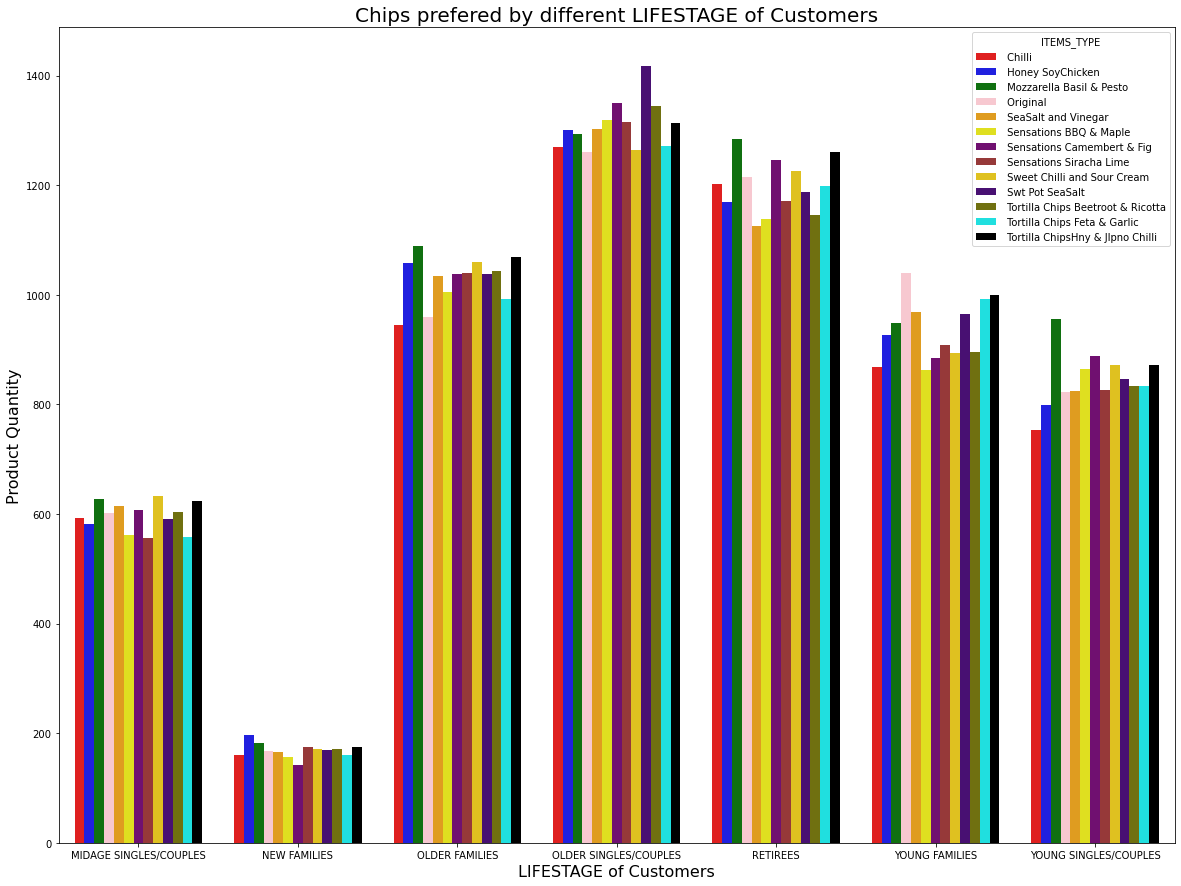

In [41]:
plt.figure(figsize=(20,15))
plt.title('Chips prefered by different LIFESTAGE of Customers', fontsize=20)
LIFESTAGE_1= sns.barplot(x= df_grouping_Kattel_Chip_3['LIFESTAGE'], y= df_grouping_Kattel_Chip_3['PRODUCT_QTY'], hue= df_grouping_Kattel_Chip_3['ITEMS_TYPE'], orient='v',palette=['red','blue','green','pink','orange','yellow','purple', 'brown','gold', 'indigo', 'olive', 'aqua', 'black'])
plt.xlabel('LIFESTAGE of Customers', fontsize= 16)
plt.ylabel("Product Quantity", fontsize=16)

In this graph we can understand the following:-

1> The MidAge Singles/Couples prefers the Sweet Chilli and Sour Cream = 633 units purchased

2> The New Families prefers the Honey SoyChicken= 197 units purchased

3> The Older Families prefers the Mozzarella Basil & Pesto= 1089 units purchased

4> The Older Singles/Couples prefers the Sweet Pot SeaSalt= 1417 units purchased

5> The Retirees prefers the Mozzarella Basil & Pesto= 1284 units purchased

6> The Young Families prefers the Original= 1040 units purchased

7> The Young Singles/Couples prefers the Mozzarella Basil & Pesto= 956 units purchased

# Statistical Data Analysis:- PART-2

In [42]:
df_stats_data_ana= df_trans_purch
df_stats_data_ana.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE
0,2018-10-19,1,1000,1,5,Natural Chip Company,2,6.0,175g,SeaSalt,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs,3,6.3,175g,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths,2,2.9,170g,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths,5,15.0,175g,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle,3,13.8,150g,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget


##### Adding MONTH-and-YEAR column to the dataset.

In [43]:
df_stats_data_ana['MONTHS-and-YEARS']= df_stats_data_ana['DATE'].dt.to_period('M')
df_stats_data_ana.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE,MONTHS-and-YEARS
0,2018-10-19,1,1000,1,5,Natural Chip Company,2,6.0,175g,SeaSalt,YOUNG SINGLES/COUPLES,Premium,2018-10
1,2019-05-16,1,1307,348,66,CCs,3,6.3,175g,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,2019-05
2,2019-05-22,1,1343,383,61,Smiths,2,2.9,170g,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,2019-05
3,2018-08-19,2,2373,974,69,Smiths,5,15.0,175g,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,Budget,2018-08
4,2018-08-20,2,2426,1038,108,Kettle,3,13.8,150g,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget,2018-08


In [44]:
df_stats_data_ana['MONTHS-and-YEARS']= df_stats_data_ana['MONTHS-and-YEARS'].replace({
    '2018-01': '2018-January',
    '2018-02': '2018-February',
    '2018-03': '2018-March',
    '2018-04': '2018-April',
    '2018-05': '2018-May',
    '2018-06': '2018-June',
    '2018-07': '2018-July',
    '2018-08': '2018-August',
    '2018-09': '2018-September',
    '2018-10': '2018-October',
    '2018-11': '2018-November',
    '2018-12': '2018-December',
    
    '2019-01': '2019-January',
    '2019-02': '2019-February',
    '2019-03': '2019-March',
    '2019-04': '2019-April',
    '2019-05': '2019-May',
    '2019-06': '2019-June',
    '2019-07': '2019-July',
    '2019-08': '2019-August',
    '2019-09': '2019-September',
    '2019-10': '2019-October',
    '2019-11': '2019-November',
    '2019-12': '2019-December'
})
df_stats_data_ana.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE,MONTHS-and-YEARS
0,2018-10-19,1,1000,1,5,Natural Chip Company,2,6.0,175g,SeaSalt,YOUNG SINGLES/COUPLES,Premium,2018-October
1,2019-05-16,1,1307,348,66,CCs,3,6.3,175g,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,2019-May
2,2019-05-22,1,1343,383,61,Smiths,2,2.9,170g,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,2019-May
3,2018-08-19,2,2373,974,69,Smiths,5,15.0,175g,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,Budget,2018-August
4,2018-08-20,2,2426,1038,108,Kettle,3,13.8,150g,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget,2018-August


#### Count the Number of Transaction By Date

In [45]:
number_trans_by_date= df_stats_data_ana[['DATE', 'TRANSACTION_ID', 'LIFESTAGE', 'MEMBER_TYPE', 'MONTHS-and-YEARS' ]]
number_trans_by_date.head(5)

,DATE,TRANSACTION_ID,LIFESTAGE,MEMBER_TYPE,MONTHS-and-YEARS
0,2018-10-19,1,YOUNG SINGLES/COUPLES,Premium,2018-October
1,2019-05-16,348,MIDAGE SINGLES/COUPLES,Budget,2019-May
2,2019-05-22,383,MIDAGE SINGLES/COUPLES,Budget,2019-May
3,2018-08-19,974,MIDAGE SINGLES/COUPLES,Budget,2018-August
4,2018-08-20,1038,MIDAGE SINGLES/COUPLES,Budget,2018-August


In [46]:
## Grouping the DATE and TRANSACTION_ID to count the number of TRANSACTIONS by date.

grouping_number_trans_by_date= number_trans_by_date.groupby(['DATE', 'MONTHS-and-YEARS'])['TRANSACTION_ID'].count()
grouping_number_trans_by_date

DATE        MONTHS-and-YEARS
2018-07-03  2018-July           724
2018-07-04  2018-July           711
2018-07-05  2018-July           722
2018-07-06  2018-July           714
2018-07-07  2018-July           712
2018-07-08  2018-July           762
2018-07-09  2018-July           750
2018-07-10  2018-July           696
2018-07-11  2018-July           749
2018-07-12  2018-July           705
2018-07-13  2018-July           752
2018-07-14  2018-July           760
2018-07-15  2018-July           760
2018-07-16  2018-July           713
2018-07-17  2018-July           758
2018-07-18  2018-July           734
2018-07-19  2018-July           742
2018-07-20  2018-July           740
2018-07-21  2018-July           711
2018-07-22  2018-July           727
2018-07-23  2018-July           742
2018-07-24  2018-July           724
2018-07-25  2018-July           715
2018-07-26  2018-July           689
2018-07-27  2018-July           714
2018-07-28  2018-July           719
2018-07-29  2018-July           746

In [47]:
dataframe_grouping_number_trans_by_date= grouping_number_trans_by_date.reset_index()
dataframe_grouping_number_trans_by_date.head(4)

,DATE,MONTHS-and-YEARS,TRANSACTION_ID
0,2018-07-03,2018-July,724
1,2018-07-04,2018-July,711
2,2018-07-05,2018-July,722
3,2018-07-06,2018-July,714


Text(0, 0.5, 'Avg Trans. per day')

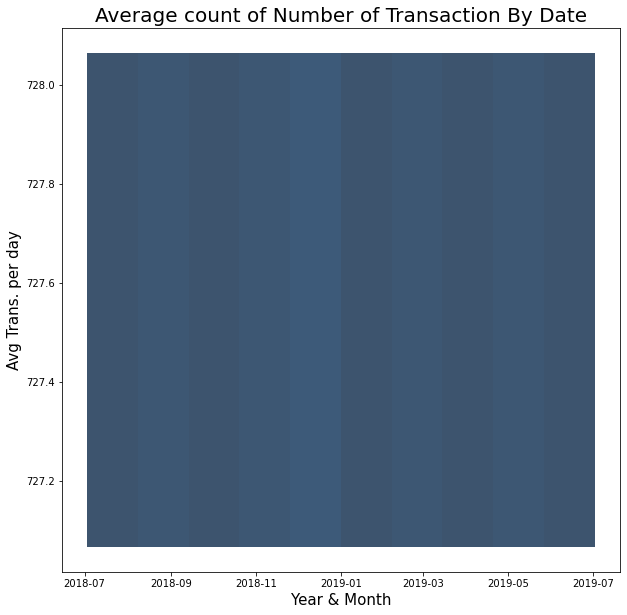

In [48]:
plt.figure(figsize=(10,10))
plt.title("Average count of Number of Transaction By Date", fontsize= 20)
trans_day= sns.histplot( y= dataframe_grouping_number_trans_by_date['TRANSACTION_ID'].mean(), x= dataframe_grouping_number_trans_by_date['DATE'])
plt.xlabel('Year & Month', fontsize= 15)
plt.ylabel('Avg Trans. per day', fontsize= 15)

 As per the analysis we can say that on an Average there were around 728 transactions made per day.

##### How was the sales performed in the monthly order ?

In [49]:
grouping_df_stats_data_ana= df_stats_data_ana.groupby('MONTHS-and-YEARS')['TOTAL_SALES'].sum()*100/total_sales
grouping_df_stats_data_ana

MONTHS-and-YEARS
2018-August       8.206074
2018-December     8.685846
2018-July         7.984890
2018-November     8.268494
2018-October      8.534397
2018-September    8.270418
2019-April        8.257398
2019-February     7.792113
2019-January      8.418387
2019-July         0.564943
2019-June         8.291664
2019-March        8.614169
2019-May          8.111207
Name: TOTAL_SALES, dtype: float64

In [50]:
df_monthly_sale=grouping_df_stats_data_ana.reset_index()
df_monthly_sale

,MONTHS-and-YEARS,TOTAL_SALES
0,2018-August,8.206074
1,2018-December,8.685846
2,2018-July,7.984890
3,2018-November,8.268494
4,2018-October,8.534397
5,2018-September,8.270418
6,2019-April,8.257398
7,2019-February,7.792113
8,2019-January,8.418387
9,2019-July,0.564943


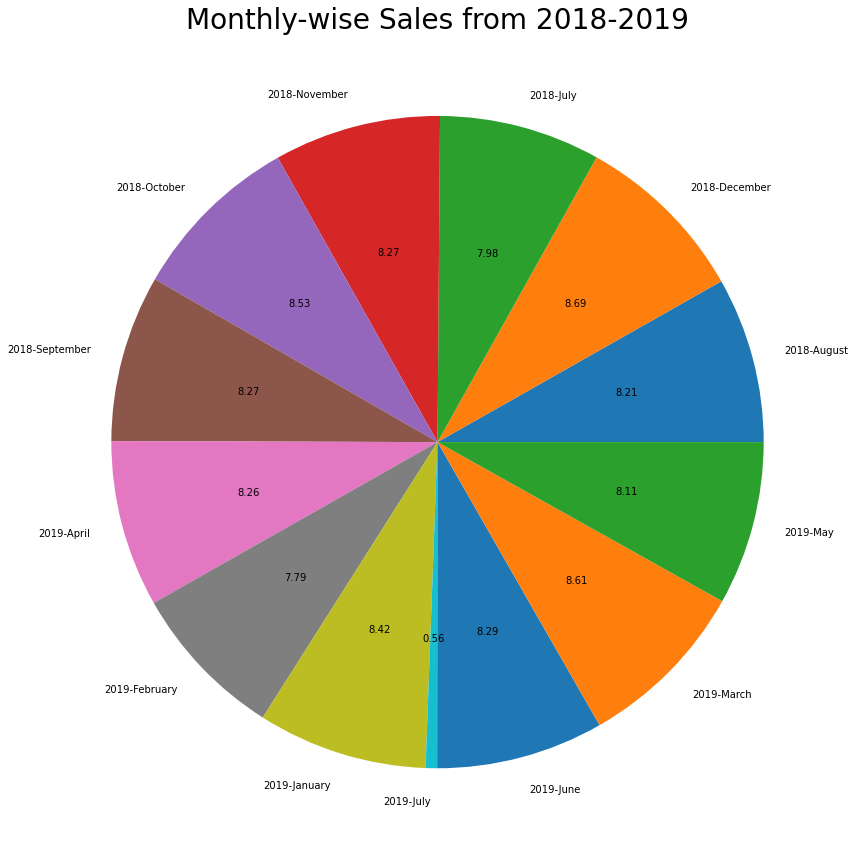

In [51]:
plt.figure(figsize=(30,15))
plt.title('Monthly-wise Sales from 2018-2019', fontsize=28)
plt.pie(labels= df_monthly_sale['MONTHS-and-YEARS'], x= df_monthly_sale ['TOTAL_SALES'], autopct='%.2f')
plt.show()

From the pie chart we can asume that the Chips sales were great the whole year. We can also observe that the month of December,2018 contributed the highest sales (8.69% of the Total Sales) probably due to the Month of Christmas. Whereas, on the month of July,2019 performed the lowest sales(0.56% of the Total Sales) probably because the sales happened for only 2 days, i.e, till '2019-07-02'.

#### Digging further into the Month with higher sales.

In [52]:
df_stats_data_ana.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE,MONTHS-and-YEARS
0,2018-10-19,1,1000,1,5,Natural Chip Company,2,6.0,175g,SeaSalt,YOUNG SINGLES/COUPLES,Premium,2018-October
1,2019-05-16,1,1307,348,66,CCs,3,6.3,175g,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,2019-May
2,2019-05-22,1,1343,383,61,Smiths,2,2.9,170g,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,2019-May
3,2018-08-19,2,2373,974,69,Smiths,5,15.0,175g,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,Budget,2018-August
4,2018-08-20,2,2426,1038,108,Kettle,3,13.8,150g,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget,2018-August


In [53]:
df_stats_data_ana_1=df_stats_data_ana['MONTHS-and-YEARS']== '2018-December'
df_stats_data_ana_2= df_stats_data_ana[df_stats_data_ana_1]
df_stats_data_ana_2.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE,MONTHS-and-YEARS
224,2018-12-16,2,2256,866,55,Sunbites,1,1.7,90g,Wholegrain Crisps Cheddr & Mstrd,MIDAGE SINGLES/COUPLES,Budget,2018-December
232,2018-12-19,2,2454,1071,34,Pringles,1,3.7,134g,Salt Vingar,MIDAGE SINGLES/COUPLES,Budget,2018-December
265,2018-12-14,4,4074,2980,4,Dorito,2,13.0,380g,Corn Chip Supreme,MIDAGE SINGLES/COUPLES,Budget,2018-December
275,2018-12-02,4,4196,3537,93,Doritos,2,7.8,150g,Corn Chip Southern Chicken,MIDAGE SINGLES/COUPLES,Budget,2018-December
284,2018-12-04,4,4371,4315,108,Kettle,2,9.2,150g,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget,2018-December


Text(0, 0.5, 'Sales in Percentage')

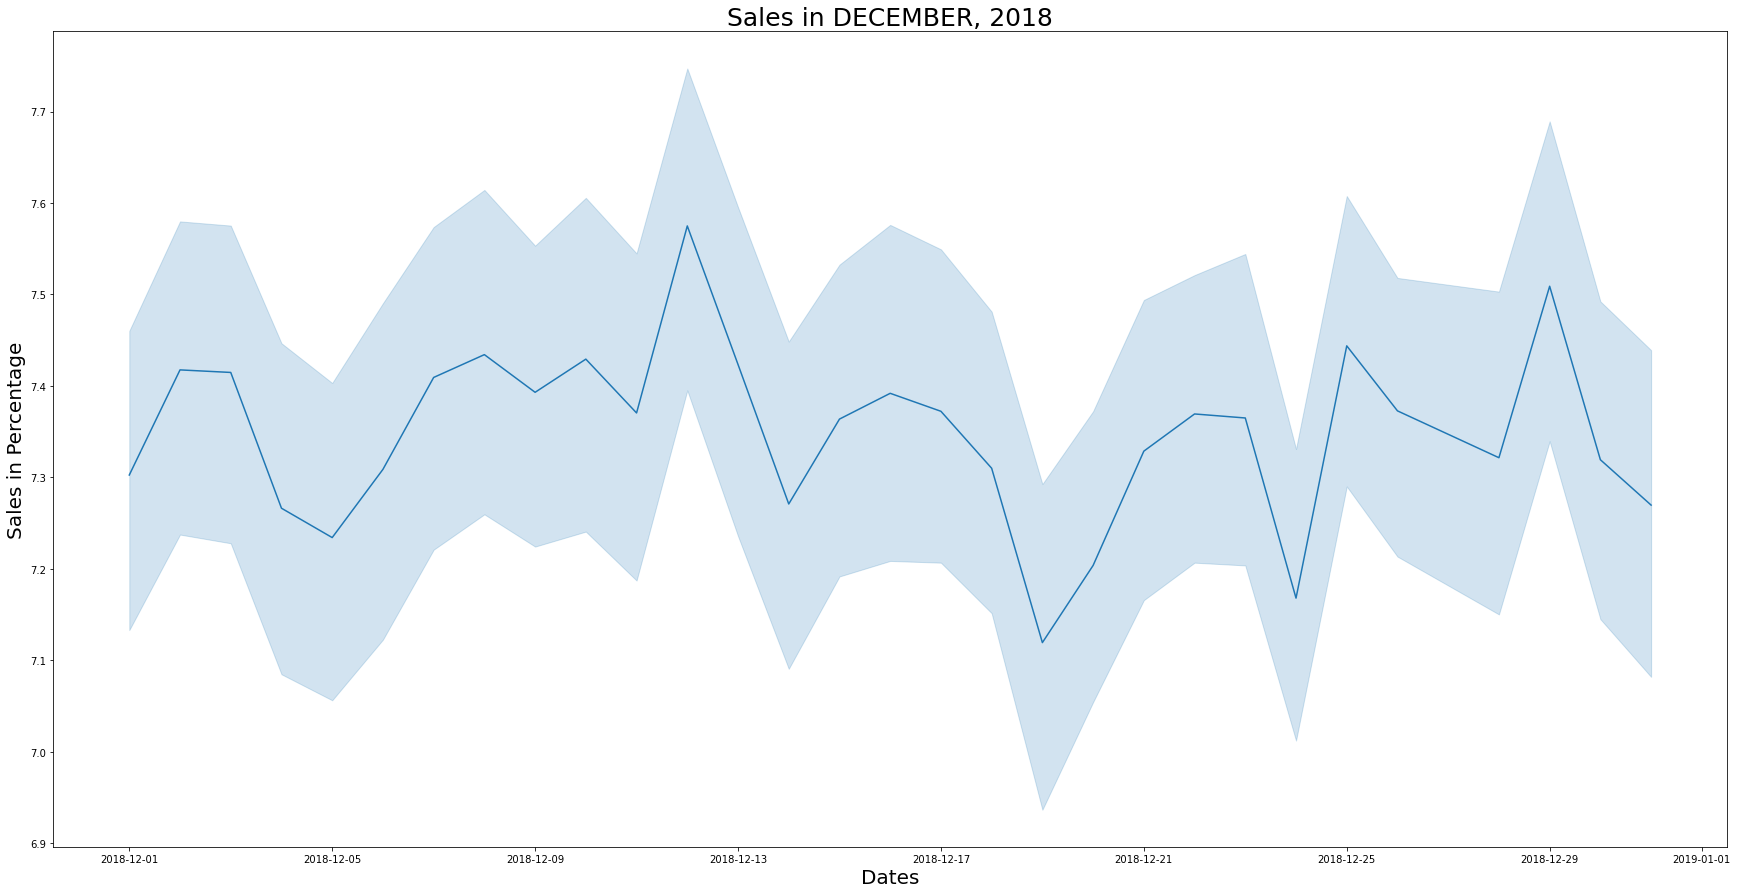

In [54]:
plt.figure(figsize=(30,15))
plt.title('Sales in DECEMBER, 2018', fontsize=25)
## plt.hist(x=df_stats_data_ana_2['DATE'], weights= df_stats_data_ana_2['TOTAL_SALES'], bins= 31,density= True )
sale_dec= sns.lineplot(x= df_stats_data_ana_2['DATE'], y= df_stats_data_ana_2['TOTAL_SALES'])
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Sales in Percentage', fontsize=20)

On the month of December-2018, the maximum sales happened between '2018-12-09' to '2018-12-13'. Moreover, the sales took a fall from '2018-12-13' and continued till '2018-12-25' and later rised up again after '2018-12-25'.

#### Which type of customers  spends the most on chips

In [55]:
df_lifestage= df_trans_purch[['PRODUCT_NAME', "PRODUCT_QTY", 'TOTAL_SALES', 'LIFESTAGE', 'MEMBER_TYPE' ]]
df_lifestage.head(5)

,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,LIFESTAGE,MEMBER_TYPE
0,Natural Chip Company,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,CCs,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,Smiths,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,Smiths,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,Kettle,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [56]:
## Grouping the LifeStage and Member_Type and suming up the Total_Sales to see who gave the most sales.

grouping_LIFESTAGE_Member = df_lifestage.groupby(["LIFESTAGE", "MEMBER_TYPE"])['TOTAL_SALES'].sum()*100/total_sales
grouping_LIFESTAGE_Member

LIFESTAGE               MEMBER_TYPE
MIDAGE SINGLES/COUPLES  Budget         1.837180
                        Mainstream     4.697281
                        Premium        3.022720
NEW FAMILIES            Budget         1.134358
                        Mainstream     0.880129
                        Premium        0.594434
OLDER FAMILIES          Budget         8.709428
                        Mainstream     5.351236
                        Premium        4.172457
OLDER SINGLES/COUPLES   Budget         7.075099
                        Mainstream     6.900459
                        Premium        6.841970
RETIREES                Budget         5.853133
                        Mainstream     8.053171
                        Premium        5.051228
YOUNG FAMILIES          Budget         7.208358
                        Mainstream     4.799960
                        Premium        4.346637
YOUNG SINGLES/COUPLES   Budget         3.162854
                        Mainstream     8.153762
    

In [57]:
## Converting the GroupBy of LIFESTAGE and Member_Type to a DataFrame so that we can use it for graphing.

df_of_grouping_LIFESTAGE_Member= grouping_LIFESTAGE_Member.reset_index()
df_of_grouping_LIFESTAGE_Member.head(5)

,LIFESTAGE,MEMBER_TYPE,TOTAL_SALES
0,MIDAGE SINGLES/COUPLES,Budget,1.837180
1,MIDAGE SINGLES/COUPLES,Mainstream,4.697281
2,MIDAGE SINGLES/COUPLES,Premium,3.022720
3,NEW FAMILIES,Budget,1.134358
4,NEW FAMILIES,Mainstream,0.880129


Text(0, 0.5, 'Percentage of Sales')

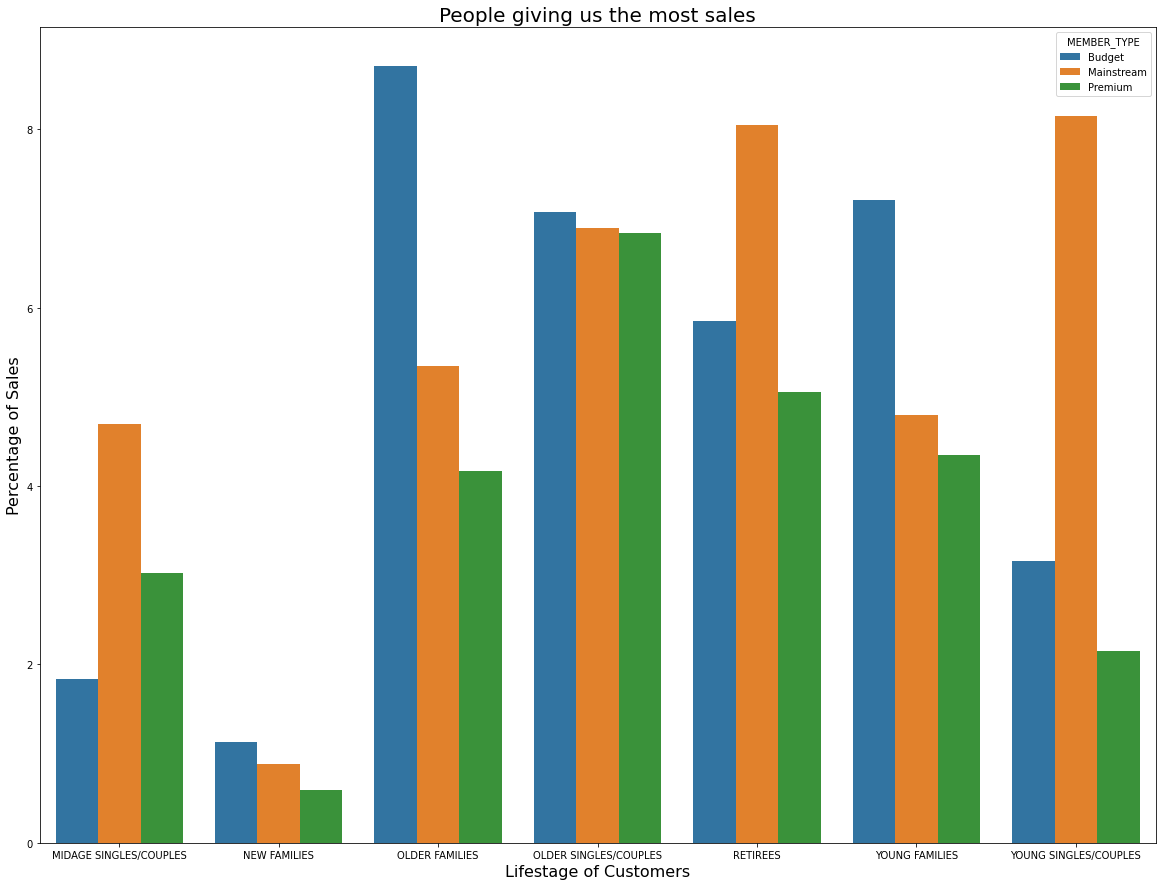

In [58]:
plt.figure(figsize=(20,15))
plt.title('People giving us the most sales', fontsize=20)
An1= sns.barplot(x= df_of_grouping_LIFESTAGE_Member['LIFESTAGE'], y=df_of_grouping_LIFESTAGE_Member['TOTAL_SALES'], hue=df_of_grouping_LIFESTAGE_Member['MEMBER_TYPE'], orient='v')
plt.xlabel('Lifestage of Customers', fontsize= 16)
plt.ylabel("Percentage of Sales", fontsize=16)

The Customers who gave us the most sales are

 1> Older Families gave us the most sales under the Budget membership with around (8.70%).
 
 2> Young Singles/ Couples and Retires gave us the most sales under the Mainstream membership with around (8.15%)
 
 3> Older Singles/ Couples gave us the most sales under the Premium membership with around (6.84%).

#### How many Customers are in each segment.

In [59]:
df_customer= df_trans_purch[['LOYALTY_CARD_NUMBER', 'TRANSACTION_ID', 'LIFESTAGE', 'MEMBER_TYPE']]
df_customer.head(5)

,LOYALTY_CARD_NUMBER,TRANSACTION_ID,LIFESTAGE,MEMBER_TYPE
0,1000,1,YOUNG SINGLES/COUPLES,Premium
1,1307,348,MIDAGE SINGLES/COUPLES,Budget
2,1343,383,MIDAGE SINGLES/COUPLES,Budget
3,2373,974,MIDAGE SINGLES/COUPLES,Budget
4,2426,1038,MIDAGE SINGLES/COUPLES,Budget


In [60]:
total_customers= df_customer["LOYALTY_CARD_NUMBER"].nunique()
total_customers

72636

There are a Total of 72636 customers as per unique Loyalty card number.

In [61]:
## Creating GroupBy  of Member_Type and counting the LOYALTY CARD NUMBER of each Member Type

df_customer_group= df_customer.groupby('MEMBER_TYPE')['LOYALTY_CARD_NUMBER'].nunique()*100/total_customers
df_customer_group

MEMBER_TYPE
Budget        33.688529
Mainstream    40.262404
Premium       26.049067
Name: LOYALTY_CARD_NUMBER, dtype: float64

<AxesSubplot:ylabel='MEMBER_TYPE'>

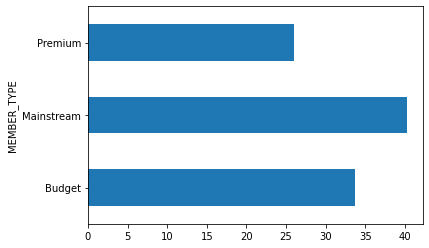

In [62]:
df_customer_group.plot.barh()

There are a total of 72636 Customer, in which around 33.68% of total customer are from Budget Memberships, around 40.26% of total customer are from Mainstream Memberships, around 26.04% of total customer are from Premium Memberships

#### How many chips are bought per customer by segment.

In [63]:
df_chips_bought= df_trans_purch[['LOYALTY_CARD_NUMBER','LIFESTAGE', 'TRANSACTION_ID', 'PRODUCT_QTY', 'MEMBER_TYPE']]
df_chips_bought.head(5)

,LOYALTY_CARD_NUMBER,LIFESTAGE,TRANSACTION_ID,PRODUCT_QTY,MEMBER_TYPE
0,1000,YOUNG SINGLES/COUPLES,1,2,Premium
1,1307,MIDAGE SINGLES/COUPLES,348,3,Budget
2,1343,MIDAGE SINGLES/COUPLES,383,2,Budget
3,2373,MIDAGE SINGLES/COUPLES,974,5,Budget
4,2426,MIDAGE SINGLES/COUPLES,1038,3,Budget


In [64]:
chips_bought_grouping= df_chips_bought.groupby(['MEMBER_TYPE','LIFESTAGE'])['PRODUCT_QTY'].mean()
chips_bought_grouping

MEMBER_TYPE  LIFESTAGE             
Budget       MIDAGE SINGLES/COUPLES    1.891633
             NEW FAMILIES              1.853910
             OLDER FAMILIES            1.945812
             OLDER SINGLES/COUPLES     1.913403
             RETIREES                  1.892244
             YOUNG FAMILIES            1.940749
             YOUNG SINGLES/COUPLES     1.803830
Mainstream   MIDAGE SINGLES/COUPLES    1.911656
             NEW FAMILIES              1.857634
             OLDER FAMILIES            1.948610
             OLDER SINGLES/COUPLES     1.910525
             RETIREES                  1.887543
             YOUNG FAMILIES            1.940342
             YOUNG SINGLES/COUPLES     1.852498
Premium      MIDAGE SINGLES/COUPLES    1.889727
             NEW FAMILIES              1.860919
             OLDER FAMILIES            1.945576
             OLDER SINGLES/COUPLES     1.914273
             RETIREES                  1.900122
             YOUNG FAMILIES            1.937732
    

In [65]:
df_chips_bought_grouping= chips_bought_grouping.reset_index()
df_chips_bought_grouping.head(5)

,MEMBER_TYPE,LIFESTAGE,PRODUCT_QTY
0,Budget,MIDAGE SINGLES/COUPLES,1.891633
1,Budget,NEW FAMILIES,1.853910
2,Budget,OLDER FAMILIES,1.945812
3,Budget,OLDER SINGLES/COUPLES,1.913403
4,Budget,RETIREES,1.892244


Text(0, 0.5, 'Avg chip pckt')

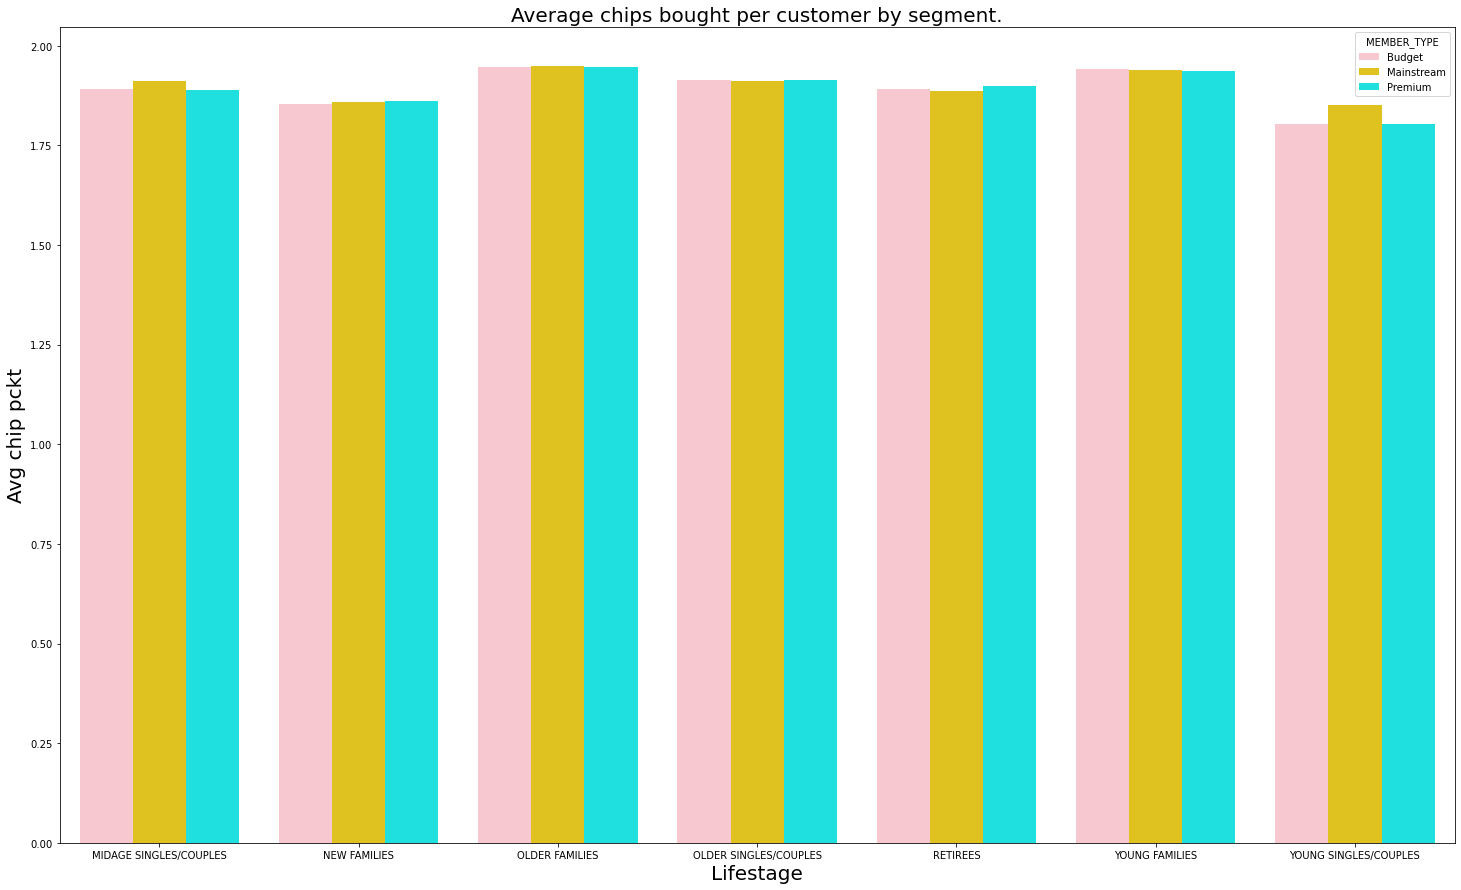

In [66]:
plt.figure(figsize=(25,15))
plt.title('Average chips bought per customer by segment.', fontsize= 20)
avg_chips_bought= sns.barplot(x= df_chips_bought_grouping['LIFESTAGE'], y= df_chips_bought_grouping['PRODUCT_QTY'], hue= df_chips_bought_grouping['MEMBER_TYPE'],palette= ('pink', 'gold', 'aqua') )
plt.xlabel('Lifestage', fontsize= 20)
plt.ylabel('Avg chip pckt', fontsize= 20)


As we know that there are a total of 72636 Customers. We can say that on an AVERAGE a customer bought around 2 packets of Chips from the supermarket. We can also say that in general the OLD FAMILIES and YOUNG FAMILIES bought more chips.

#### What is the average price per unit chips bought by each customer segment

In [67]:
df_chips_price= df_trans_purch[['PRODUCT_NAME', 'ITEMS_TYPE', 'LIFESTAGE', 'PRODUCT_QTY', 'MEMBER_TYPE', 'TOTAL_SALES']]
df_chips_price.head(5)

,PRODUCT_NAME,ITEMS_TYPE,LIFESTAGE,PRODUCT_QTY,MEMBER_TYPE,TOTAL_SALES
0,Natural Chip Company,SeaSalt,YOUNG SINGLES/COUPLES,2,Premium,6.0
1,CCs,Nacho Cheese,MIDAGE SINGLES/COUPLES,3,Budget,6.3
2,Smiths,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,2,Budget,2.9
3,Smiths,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,5,Budget,15.0
4,Kettle,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,3,Budget,13.8


In [68]:
df_chips_price['ITEMS_TYPE'].nunique()  

111

There are a Total of 111 different flavours of Chips

In [69]:
## Adding a Column to know the price of Per Chips.

df_chips_price["Per_Chips_Price"]= df_chips_price['TOTAL_SALES']/df_chips_price['PRODUCT_QTY']
df_chips_price.head(5)

C:\Users\Personal\AppData\Local\Temp/ipykernel_14796/3095713525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chips_price["Per_Chips_Price"]= df_chips_price['TOTAL_SALES']/df_chips_price['PRODUCT_QTY']


,PRODUCT_NAME,ITEMS_TYPE,LIFESTAGE,PRODUCT_QTY,MEMBER_TYPE,TOTAL_SALES,Per_Chips_Price
0,Natural Chip Company,SeaSalt,YOUNG SINGLES/COUPLES,2,Premium,6.0,3.00
1,CCs,Nacho Cheese,MIDAGE SINGLES/COUPLES,3,Budget,6.3,2.10
2,Smiths,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,2,Budget,2.9,1.45
3,Smiths,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,5,Budget,15.0,3.00
4,Kettle,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,3,Budget,13.8,4.60


In [70]:
## Grouping the Lifestage and Member_Type to find out the Average Chips prices in each segment.

grouping_df_chips_price= df_chips_price.groupby(['LIFESTAGE','MEMBER_TYPE'])['Per_Chips_Price'].mean()
grouping_df_chips_price

LIFESTAGE               MEMBER_TYPE
MIDAGE SINGLES/COUPLES  Budget         3.728496
                        Mainstream     4.000101
                        Premium        3.752915
NEW FAMILIES            Budget         3.919251
                        Mainstream     3.916581
                        Premium        3.871743
OLDER FAMILIES          Budget         3.733344
                        Mainstream     3.727383
                        Premium        3.704625
OLDER SINGLES/COUPLES   Budget         3.877022
                        Mainstream     3.803800
                        Premium        3.887220
RETIREES                Budget         3.924883
                        Mainstream     3.833343
                        Premium        3.921323
YOUNG FAMILIES          Budget         3.753659
                        Mainstream     3.707097
                        Premium        3.752402
YOUNG SINGLES/COUPLES   Budget         3.637681
                        Mainstream     4.071485
    

In [71]:
df_of_grouping_df_chips_price= grouping_df_chips_price.reset_index()
df_of_grouping_df_chips_price

,LIFESTAGE,MEMBER_TYPE,Per_Chips_Price
0,MIDAGE SINGLES/COUPLES,Budget,3.728496
1,MIDAGE SINGLES/COUPLES,Mainstream,4.000101
2,MIDAGE SINGLES/COUPLES,Premium,3.752915
3,NEW FAMILIES,Budget,3.919251
4,NEW FAMILIES,Mainstream,3.916581
5,NEW FAMILIES,Premium,3.871743
6,OLDER FAMILIES,Budget,3.733344
7,OLDER FAMILIES,Mainstream,3.727383
8,OLDER FAMILIES,Premium,3.704625
9,OLDER SINGLES/COUPLES,Budget,3.877022


Text(0, 0.5, 'Avg price per unit chips')

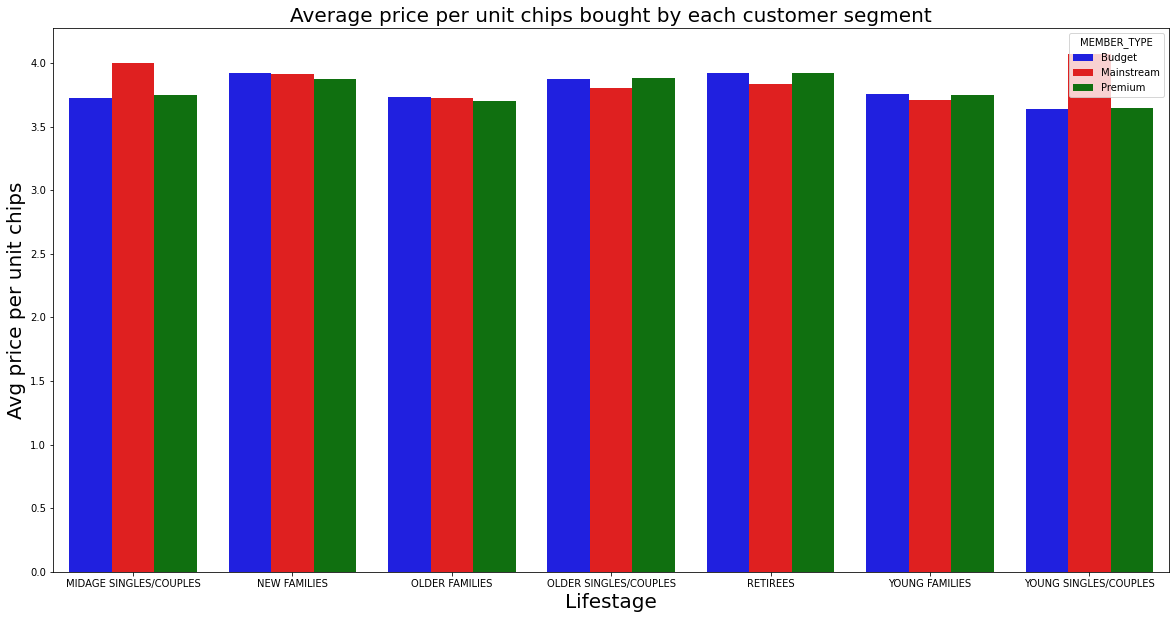

In [72]:
plt.figure(figsize=(20,10))
plt.title('Average price per unit chips bought by each customer segment', fontsize= 20)
avg_price= sns.barplot(x= df_of_grouping_df_chips_price['LIFESTAGE'], hue= df_of_grouping_df_chips_price['MEMBER_TYPE'], y= df_of_grouping_df_chips_price['Per_Chips_Price'], palette= ('blue', 'red', 'green'))
plt.xlabel('Lifestage', fontsize= 20)
plt.ylabel('Avg price per unit chips', fontsize= 20)

From the above graph, we can see that the ***MAINSTREAM*** **"MIDAGE SINGLE/COUPLES"** and ***MAINSTREAM*** **"YOUNG SINGLE/COUPLES"** paid more for a packet of chips compaired to other MEMBER_TYPES. 

  Since the difference of the average of price of ***MAINSTREAM*** **"MIDAGE SINGLE/COUPLES"** and ***MAINSTREAM*** **"YOUNG SINGLE/COUPLES"** is not large from ***BUDGET*** MIDAGE SINGLE/COUPLES & YOUNG SINGLE/COUPLES *and* ***PREMIMUM***  MIDAGE SINGLE/COUPLES & YOUNG SINGLE/COUPLES, we can check if there is a **MEAN difference** between them in a statistically way, by using **T-test**.

### Perform INDEPENDENT T-TEST between "MAINSTREAM vs PREMIUMvsBUDGET" where the lifestage is "MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES".     The unit price for "MAINSTREAM" "MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES" [ ARE/ ARE NOT ] significantly higher than that of  "BUDGET" or "PREMIUM" "MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES". 

***MAINSTREAM MIDAGE & YOUNG dataframe***

In [73]:
MAINSTREAM_MIDAGE_YOUNG_1= (df_chips_price['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') | (df_chips_price['LIFESTAGE']=='YOUNG SINGLES/COUPLES')
MAINSTREAM_df_abc= df_chips_price[MAINSTREAM_MIDAGE_YOUNG_1]
MAINSTREAM_df_123= MAINSTREAM_df_abc['MEMBER_TYPE'] == 'Mainstream'
MAINSTREAM_MIDAGE_YOUNG= MAINSTREAM_df_abc[MAINSTREAM_df_123]

MAINSTREAM_MIDAGE_YOUNG.head(5)

,PRODUCT_NAME,ITEMS_TYPE,LIFESTAGE,PRODUCT_QTY,MEMBER_TYPE,TOTAL_SALES,Per_Chips_Price
5021,Doritos,Corn Chips Nacho Cheese,MIDAGE SINGLES/COUPLES,2,Mainstream,8.8,4.4
5022,Doritos,Mexicana,MIDAGE SINGLES/COUPLES,2,Mainstream,8.8,4.4
5023,Kettle,Sweet Chilli and Sour Cream,MIDAGE SINGLES/COUPLES,2,Mainstream,10.8,5.4
5024,Doritos,Corn Chips Original,MIDAGE SINGLES/COUPLES,2,Mainstream,8.8,4.4
5025,Kettle,Sensations Siracha Lime,MIDAGE SINGLES/COUPLES,1,Mainstream,4.6,4.6


In [74]:
MAINSTREAM_MIDAGE_YOUNG['MEMBER_TYPE'].unique()

array(['Mainstream'], dtype=object)

***BUDGET MIDAGE & YOUNG dataframe***

In [75]:
BUDGET_MIDAGE_YOUNG_1= (df_chips_price['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') | (df_chips_price['LIFESTAGE']=='YOUNG SINGLES/COUPLES')
BUDGET_df_abc = df_chips_price[BUDGET_MIDAGE_YOUNG_1]
BUDGET_df_123= BUDGET_df_abc['MEMBER_TYPE'] == 'Budget'
BUDGET_MIDAGE_YOUNG= BUDGET_df_abc[BUDGET_df_123]

BUDGET_MIDAGE_YOUNG.head(5)

,PRODUCT_NAME,ITEMS_TYPE,LIFESTAGE,PRODUCT_QTY,MEMBER_TYPE,TOTAL_SALES,Per_Chips_Price
1,CCs,Nacho Cheese,MIDAGE SINGLES/COUPLES,3,Budget,6.3,2.10
2,Smiths,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,2,Budget,2.9,1.45
3,Smiths,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,5,Budget,15.0,3.00
4,Kettle,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,3,Budget,13.8,4.60
5,Old El Paso,Salsa Dip Tomato Mild,MIDAGE SINGLES/COUPLES,1,Budget,5.1,5.10


In [76]:
BUDGET_MIDAGE_YOUNG['MEMBER_TYPE'].unique()

array(['Budget'], dtype=object)

***PREMIMUM MIDAGE & YOUNG dataframe***

In [77]:
PREMIMUM_MIDAGE_YOUNG_1= (df_chips_price['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') | (df_chips_price['LIFESTAGE']=='YOUNG SINGLES/COUPLES')
PREMIMUM_df_abc= df_chips_price[PREMIMUM_MIDAGE_YOUNG_1]
PREMIMUM_df_123= PREMIMUM_df_abc['MEMBER_TYPE']== 'Premium'
PREMIMUM_MIDAGE_YOUNG= PREMIMUM_df_abc[PREMIMUM_df_123]

PREMIMUM_MIDAGE_YOUNG.head(5)

,PRODUCT_NAME,ITEMS_TYPE,LIFESTAGE,PRODUCT_QTY,MEMBER_TYPE,TOTAL_SALES,Per_Chips_Price
0,Natural Chip Company,SeaSalt,YOUNG SINGLES/COUPLES,2,Premium,6.00,3.00
16895,Pringles,Original Crisps,MIDAGE SINGLES/COUPLES,2,Premium,3.70,1.85
16896,Red Rock Deli,SR Slow Rst Pork Belly,MIDAGE SINGLES/COUPLES,2,Premium,2.70,1.35
16897,Tostitos,Splash Of Lime,MIDAGE SINGLES/COUPLES,2,Premium,8.80,4.40
16898,Dorito,Corn Chip Supreme,MIDAGE SINGLES/COUPLES,1,Premium,3.25,3.25


In [78]:
PREMIMUM_MIDAGE_YOUNG['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'], dtype=object)

***CONCATENATING Budget & Premimum***

In [79]:
Budget_Premium_concat= pd.concat([BUDGET_MIDAGE_YOUNG, PREMIMUM_MIDAGE_YOUNG], axis=0)
Budget_Premium_concat.head(5)

,PRODUCT_NAME,ITEMS_TYPE,LIFESTAGE,PRODUCT_QTY,MEMBER_TYPE,TOTAL_SALES,Per_Chips_Price
1,CCs,Nacho Cheese,MIDAGE SINGLES/COUPLES,3,Budget,6.3,2.10
2,Smiths,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,2,Budget,2.9,1.45
3,Smiths,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,5,Budget,15.0,3.00
4,Kettle,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,3,Budget,13.8,4.60
5,Old El Paso,Salsa Dip Tomato Mild,MIDAGE SINGLES/COUPLES,1,Budget,5.1,5.10


***SAMPLING*** Mainstream, Budget, Premium

In [80]:
## Here taking 28 samples of MAINSTREAM. Using RANDOM SAMPLING 

sampling_MAINSTREAM_MIDAGE_YOUNG= MAINSTREAM_MIDAGE_YOUNG.sample(n=28, random_state=1 )
sampling_MAINSTREAM_MIDAGE_YOUNG.head(5)

,PRODUCT_NAME,ITEMS_TYPE,LIFESTAGE,PRODUCT_QTY,MEMBER_TYPE,TOTAL_SALES,Per_Chips_Price
240051,Pringles,Mystery Flavour,YOUNG SINGLES/COUPLES,2,Mainstream,7.4,3.7
246208,Cheetos,Puffs,YOUNG SINGLES/COUPLES,2,Mainstream,5.6,2.8
6341,Kettle,Chilli,MIDAGE SINGLES/COUPLES,2,Mainstream,10.8,5.4
254548,Kettle,Sensations Siracha Lime,YOUNG SINGLES/COUPLES,2,Mainstream,9.2,4.6
11080,Pringles,Chicken Salt Crips,MIDAGE SINGLES/COUPLES,2,Mainstream,7.4,3.7


In [81]:
sampling_MAINSTREAM_MIDAGE_YOUNG.describe()

,PRODUCT_QTY,TOTAL_SALES,Per_Chips_Price
count,28.000000,28.000000,28.000000
mean,1.857143,7.425000,4.035714
std,0.356348,2.360104,1.061520
min,1.000000,3.000000,1.500000
25%,2.000000,5.925000,3.525000
50%,2.000000,7.400000,3.700000
75%,2.000000,8.500000,4.450000
max,2.000000,13.000000,6.500000


In [82]:
## Here taking 24 samples of BUDGET and PREMIMUM. Using RANDOM SAMPLING

sampling_Budget_Premium_concat= Budget_Premium_concat.sample(n=24, random_state=1 )
sampling_Budget_Premium_concat.tail(5)

,PRODUCT_NAME,ITEMS_TYPE,LIFESTAGE,PRODUCT_QTY,MEMBER_TYPE,TOTAL_SALES,Per_Chips_Price
230050,Red Rock Deli,Sweet Chilli & Sour Cream,YOUNG SINGLES/COUPLES,2,Budget,6.0,3.0
230100,Kettle,Tortilla ChipsHny & Jlpno Chilli,YOUNG SINGLES/COUPLES,2,Budget,9.2,4.6
1954,Old El Paso,Salsa Dip Chnky Tom Ht,MIDAGE SINGLES/COUPLES,2,Budget,10.2,5.1
4913,Smiths,Chip Thinly CutSalt/Vinegr,MIDAGE SINGLES/COUPLES,2,Budget,6.0,3.0
234355,Red Rock Deli,Pc SeaSalt,YOUNG SINGLES/COUPLES,1,Budget,3.0,3.0


In [83]:
sampling_Budget_Premium_concat.describe()

,PRODUCT_QTY,TOTAL_SALES,Per_Chips_Price
count,24.000000,24.000000,24.000000
mean,1.708333,6.158333,3.554167
std,0.464306,2.808979,1.216545
min,1.000000,1.900000,1.500000
25%,1.000000,3.675000,2.975000
50%,2.000000,6.000000,3.300000
75%,2.000000,7.900000,4.450000
max,2.000000,11.800000,5.900000


###### 1> Defining Hypothesis:-

NULL HYPO (H0) :- The unit price of MAINSTREAM's 'MIDAGE SINGLES/COUPLES' and 'YOUNG SINGLES/COUPLES'    {ARE}   significantly higher than that of BUDGET's or PREMIUM's "MIDAGE SINGLES/COUPLES" and "YOUNG SINGLES/COUPLES".

ALTERNATE HYPO (H1) :- The unit price of MAINSTREAM's 'MIDAGE SINGLES/COUPLES' and 'YOUNG SINGLES/COUPLES'     {ARE NOT}     significantly higher than that of BUDGET's or PREMIUM's "MIDAGE SINGLES/COUPLES" and "YOUNG SINGLES/COUPLES".




###### 2> State the ALPHA:-

Since, the ALPHA and the CONFIDENCE INTERVAL is not given, we are assuming the ALPHA is 0.05% making the CONFIDENCE INTERVAL of 0.95%

sample_mean_1 = 4.035714

sample_mean_2 = 3.554167

sample_lenght_1= 28

sample_lenght_2= 24

Significance interval= 0.05

std_1= 1.061520

std_2= 1.216545

###### 3> Calculate the Degree of Freedom of INDEPENDENT SAMPLE T-test:-

Formula:-  df=  (n1 -1) + (n2 -1) 

In [84]:
n1= 28
n2= 24

degree_of_freedom= (n1-1)+(n2-1)
degree_of_freedom

50

Since, the SI=0.05% and CI= 0.95% following this if we see the T-table to find the t-value, the value is (+,-) 2.0086

##### 4> State the Decision Rule :-

If the T-test is Greater than (-2.0086) and Lesser than (+2.0086) we will accept the NULL HYPOTHESIS, which is "The unit price of MAINSTREAM's  {ARE} significantly higher than that of BUDGET's or PREMIUM's ".

##### 5> Calculate T-test statistics:-

In [85]:
T_test_1 = sampling_MAINSTREAM_MIDAGE_YOUNG[['Per_Chips_Price']]
T_test_1

,Per_Chips_Price
240051,3.7
246208,2.8
6341,5.4
254548,4.6
11080,3.7
7762,3.3
254801,3.7
252513,3.8
250727,3.3
247856,3.6


In [86]:
T_test_2= sampling_Budget_Premium_concat['Per_Chips_Price']
T_test_2

22798     2.9
235123    3.3
184       4.4
228474    1.9
259733    3.0
24908     3.3
420       3.8
24628     1.9
22490     5.1
262938    4.4
233408    2.6
19160     3.7
258672    5.7
620       1.5
4689      5.9
4547      4.6
236498    3.0
260115    3.7
233449    1.9
230050    3.0
230100    4.6
1954      5.1
4913      3.0
234355    3.0
Name: Per_Chips_Price, dtype: float64

In [87]:
perform_T_test= stats.ttest_ind(T_test_1,T_test_2, equal_var= False) ## 'equal_var' is False because the 2 sample datasets we took doesn't have equal_varience
perform_T_test

Ttest_indResult(statistic=array([1.50845212]), pvalue=array([0.13826332]))

After performing the T-test, since the (P-value ***>*** 0.05%) this tells us the we accept the Null Hypothesis.

***NOTE:-***

**1> When the P-value is greater than the Significance Value, we accept the Null Hypothesis.**

**2> When the P-value is lesser than the Significance Value, we reject the Null Hypothesis.**

**3> In the code {stats.ttest_ind()} "equal_var" means EQUAL_VARIENCE. We kept it FALSE since the sample lenght of the 2 sample dataset are not equal, so oviouly the varience will not be equal. We should put it to TRUE if the variance were equal (after checking).**

**4> In ( stats.ttest_ind() ) the ind stands for INDEPENDENT**

##### 6> Conclusion:-

The unit price of *MAINSTREAM's 'MIDAGE SINGLES/COUPLES' and 'YOUNG SINGLES/COUPLES'*   **ARE**   significantly higher than that of *BUDGET's or PREMIUM's "MIDAGE SINGLES/COUPLES" and "YOUNG SINGLES/COUPLES".*

### Saving the Data

In [88]:
writing_df=df_stats_data_ana
writing_df.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE,MONTHS-and-YEARS
0,2018-10-19,1,1000,1,5,Natural Chip Company,2,6.0,175g,SeaSalt,YOUNG SINGLES/COUPLES,Premium,2018-October
1,2019-05-16,1,1307,348,66,CCs,3,6.3,175g,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,2019-May
2,2019-05-22,1,1343,383,61,Smiths,2,2.9,170g,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,2019-May
3,2018-08-19,2,2373,974,69,Smiths,5,15.0,175g,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,Budget,2018-August
4,2018-08-20,2,2426,1038,108,Kettle,3,13.8,150g,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget,2018-August


In [89]:
writing_df["Per_Chips_Price"]= writing_df['TOTAL_SALES']/writing_df['PRODUCT_QTY']
writing_df.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE,MONTHS-and-YEARS,Per_Chips_Price
0,2018-10-19,1,1000,1,5,Natural Chip Company,2,6.0,175g,SeaSalt,YOUNG SINGLES/COUPLES,Premium,2018-October,3.00
1,2019-05-16,1,1307,348,66,CCs,3,6.3,175g,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,2019-May,2.10
2,2019-05-22,1,1343,383,61,Smiths,2,2.9,170g,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,2019-May,1.45
3,2018-08-19,2,2373,974,69,Smiths,5,15.0,175g,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,Budget,2018-August,3.00
4,2018-08-20,2,2426,1038,108,Kettle,3,13.8,150g,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget,2018-August,4.60


In [90]:
writing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 264834 non-null  datetime64[ns]
 1   STORE_NUMBER         264834 non-null  int64         
 2   LOYALTY_CARD_NUMBER  264834 non-null  int64         
 3   TRANSACTION_ID       264834 non-null  int64         
 4   PRODUCT_NUMBER       264834 non-null  int64         
 5   PRODUCT_NAME         264834 non-null  object        
 6   PRODUCT_QTY          264834 non-null  int64         
 7   TOTAL_SALES          264834 non-null  float64       
 8   PACKAGE_SIZE         264834 non-null  object        
 9   ITEMS_TYPE           264834 non-null  object        
 10  LIFESTAGE            264834 non-null  object        
 11  MEMBER_TYPE          264834 non-null  object        
 12  MONTHS-and-YEARS     264834 non-null  object        
 13  Per_Chips_Pric

In [91]:
#saving_data= writing_df.to_excel("my_quantium_Task_1_output.xlsx")
#saving_data